## O problemu

**Dataset**: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

**Atributi dataset-a**: <br>
    CustomerID - Jedinstveni ID korisnika <br>
    Churn - Prekid korišćenja usluge kompanije <br>
    Tenure - Staž korisnika u kompaniji <br>
    PreferredLoginDevice - Odabrani uređaj za prijavu korisnika <br>
    CityTier - Nivo grada <br>
    WarehouseToHome - Udaljenost između skladišta i kuće korisnika <br>
    PreferredPaymentMode - Odabrani način plaćanja korisnika <br>
    Gender - Pol korisnika <br>
    HourSpendOnApp - Broj sati provedenih na mobilnoj aplikaciji ili veb stranici kompanije <br>
    NumberOfDeviceRegistered - Ukupan broj uređaja registrovan na određenog korisnika <br>
    PreferedOrderCat - Odabrana kategorija narudžbine korisnika u poslednjem mesecu <br>
    SatisfactionScore - Ocena zadovoljstva korisnika uslugom <br>
    MaritalStatus - Bračni status korisnika <br>
    NumberOfAddress - Ukupan broj dodatih adresa određenog korisnika <br>
    Complain - Da li je podneta žalba u poslednjem mesecu <br>
    OrderAmountHikeFromlastYear - Postotno povećanje porudžbine u odnosu na prošlu godinu <br>
    CouponUsed - Ukupan broj korišćenih kupona u poslednjem mesecu <br>
    OrderCount - Ukupan broj porudžbina koje su postavljene u poslednjem mesecu <br>
    DaySinceLastOrder - Dani od poslednje porudžbine korisnika <br>
    CashbackAmount - Prosečan povraćaj novca u poslednjem mesecu <br>

## Priprema i preobrada podataka

### Importovanje biblioteka

In [402]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

### Ucitavanje podataka

In [403]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
print("Data Shape:",df.shape) 
df.head(10) 

Data Shape: (5630, 20)


CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   
5       50006      1     0.0             Computer         1             22.0   
6       50007      1     NaN                Phone         3             11.0   
7       50008      1     NaN                Phone         1              6.0   
8       50009      1    13.0                Phone         3              9.0   
9       50010      1     NaN                Phone         1             31.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   
5           Debit Card  Female             3.0                         5   
6     Cash on Delivery    Male             2.0                         3   
7                   CC    Male             3.0                         3   
8             E wallet    Male             NaN                         4   
9           Debit Card    Male             2.0                         5   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   
5        Mobile Phone                  5        Single                2   
6  Laptop & Accessory                  2      Divorced                4   
7              Mobile                  2      Divorced                3   
8              Mobile                  3      Divorced                2   
9              Mobile                  3        Single                2   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   
5         1                         22.0         4.0         6.0   
6         0                         14.0         0.0         1.0   
7         1                         16.0         2.0         2.0   
8         1                         14.0         0.0         1.0   
9         0                         12.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60  
5                7.0          139.19  
6                0.0          120.86  
7                0.0          122.93  
8                2.0          126.83  
9                1.0          122.93

### Informacije o podacima

In [404]:
df.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.223030  
std       2.939680           3.654433       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

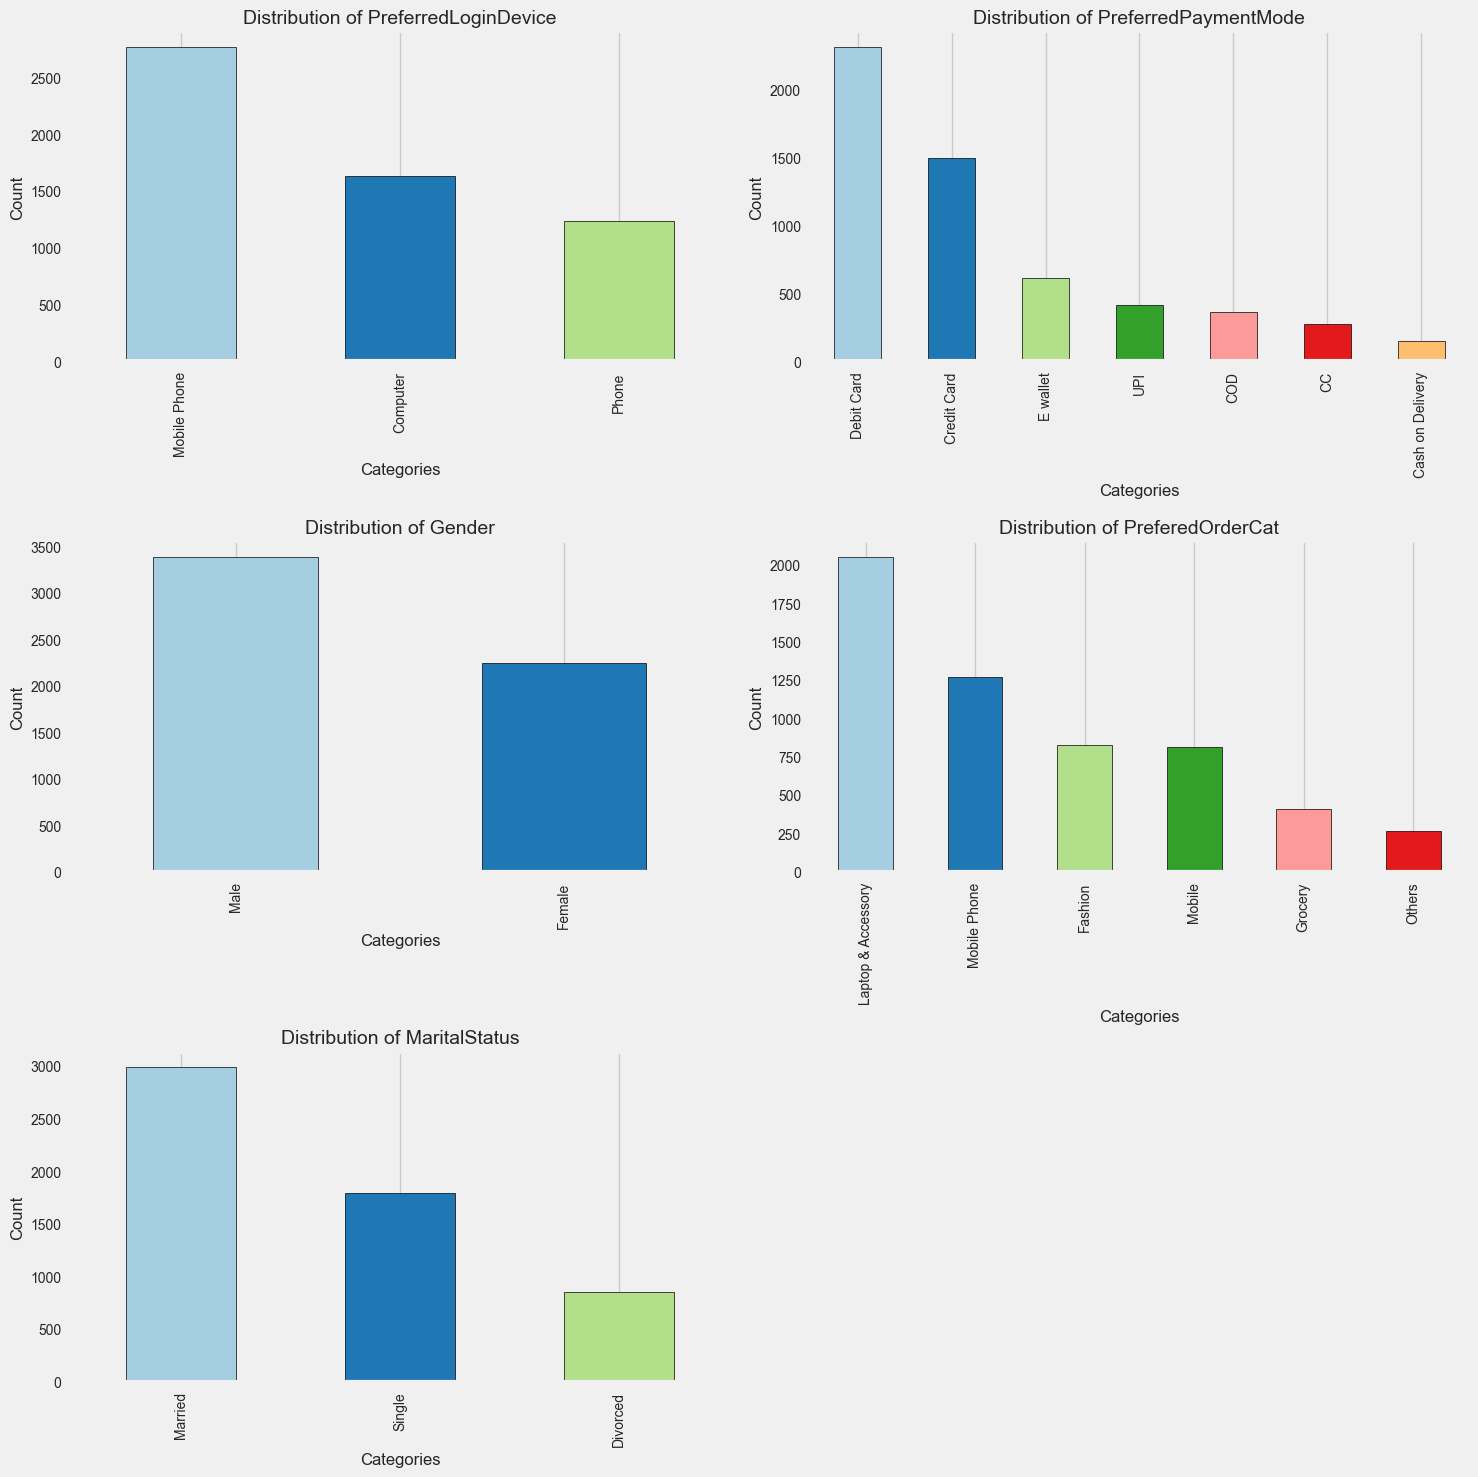

In [406]:
categorical_features = df.select_dtypes(include=['object']).columns
num_plots = len(categorical_features)
num_rows = 3
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, feature in enumerate(categorical_features):
    row, col = divmod(i, num_cols)
    ax = axes[row, col]

    colors = plt.cm.Paired(range(len(df[feature].value_counts())))
    df[feature].value_counts().plot(kind='bar', ax=ax, color=colors, edgecolor='black')

    ax.set_title(f'Distribution of {feature}', fontsize=14)
    ax.set_xlabel('Categories', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.grid(axis='y')

if num_plots % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.tight_layout()
plt.show()

Primećuje se da fičer PrefferedPaymentMode ima duplirane vrednosti (par vrednosti CC i CreditCard, kao i par COD i Cash On Delivery). Stoga je potrebno svaki par objediniti u jedinstvenu vrednost.

In [407]:
df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'   
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

In [408]:
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

In [409]:
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

In [410]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

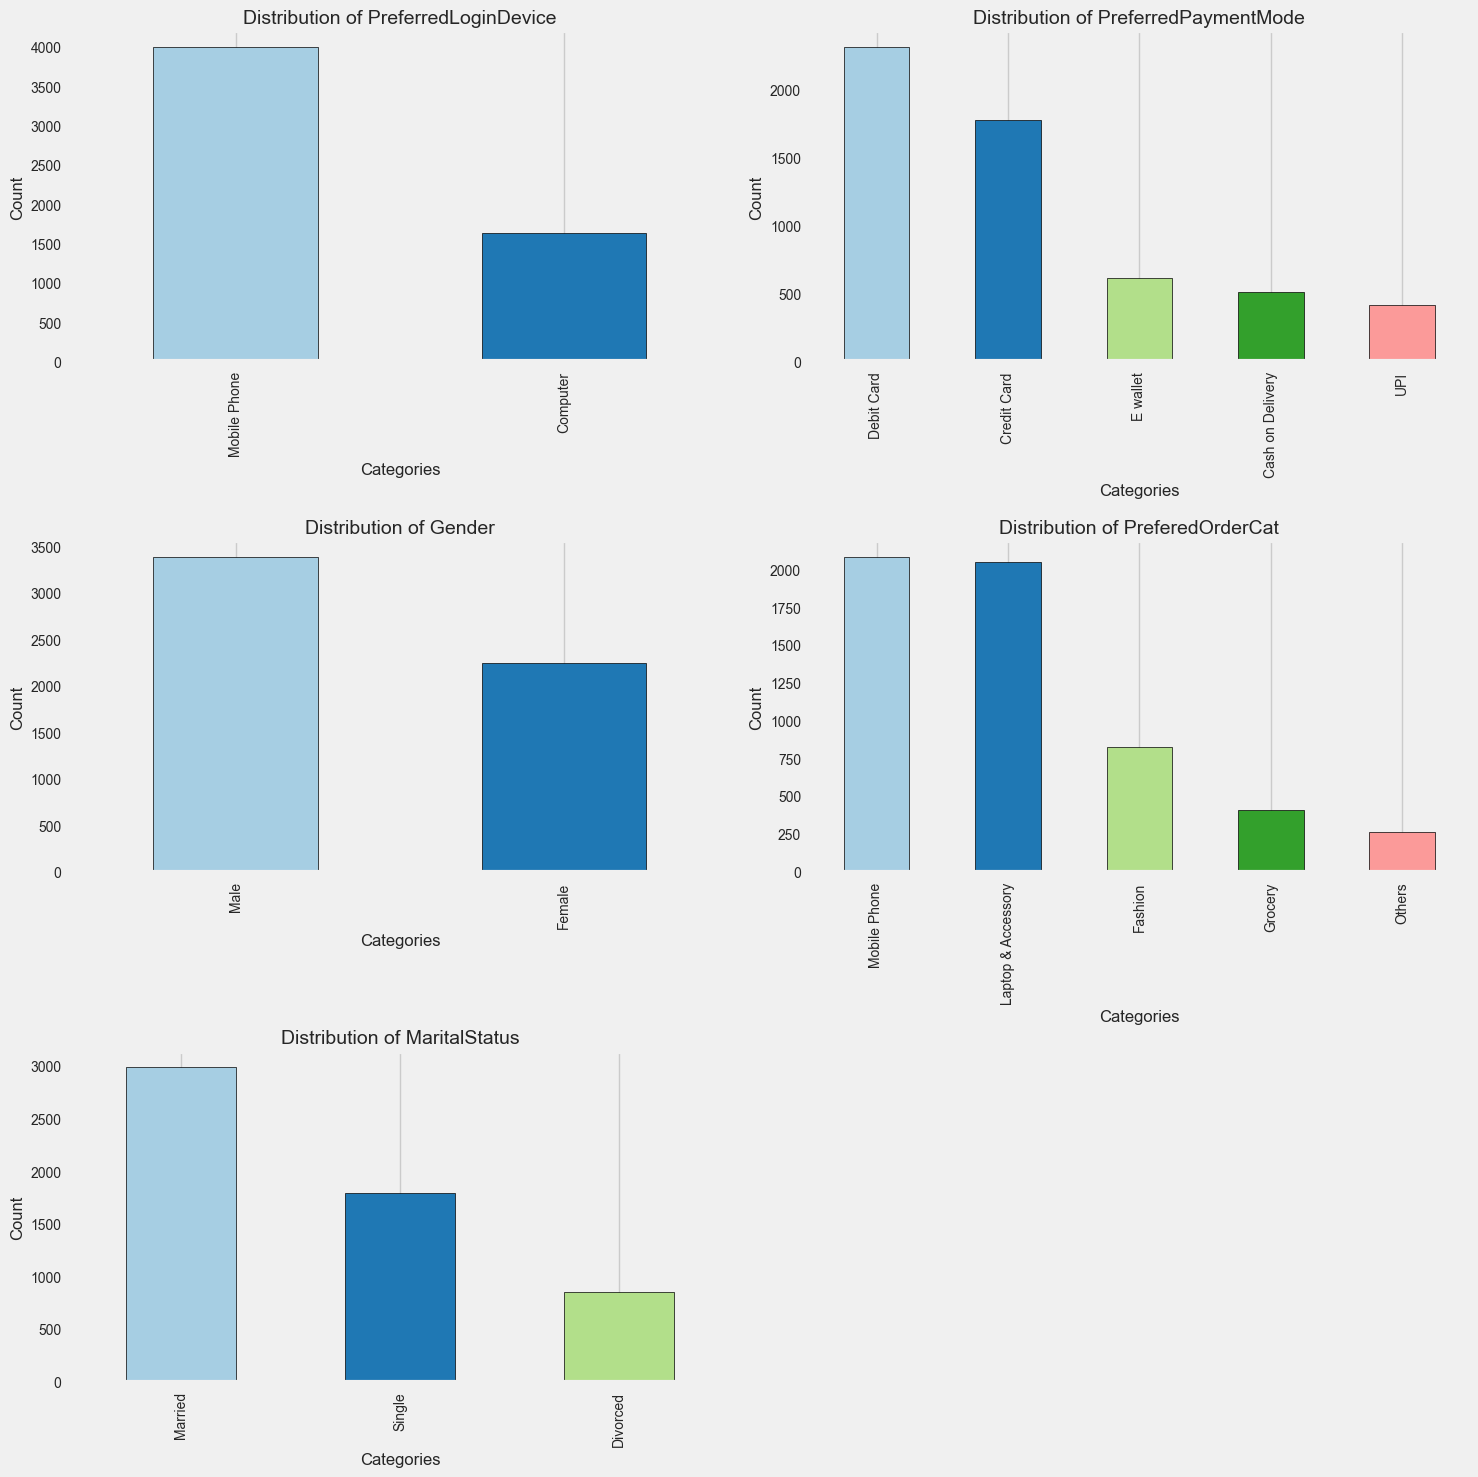

In [411]:
categorical_features = df.select_dtypes(include=['object']).columns
num_plots = len(categorical_features)
num_rows = 3
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, feature in enumerate(categorical_features):
    row, col = divmod(i, num_cols)
    ax = axes[row, col]

    colors = plt.cm.Paired(range(len(df[feature].value_counts())))
    df[feature].value_counts().plot(kind='bar', ax=ax, color=colors, edgecolor='black')

    ax.set_title(f'Distribution of {feature}', fontsize=14)
    ax.set_xlabel('Categories', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.grid(axis='y')

if num_plots % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.tight_layout()
plt.show()

In [412]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              2
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              5
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  5
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

### Detekcija duplikata

In [413]:
dupl = df.duplicated()
print('Broj duplikata: %d' % dupl.sum())


Broj duplikata: 0


### Tretman nedostajućih vrednosti

In [414]:
# Procenat nedostajućih vrednosti u svakoj koloni
round((df.isnull().sum()*100 / df.shape[0]),2)

CustomerID                     0.00
Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

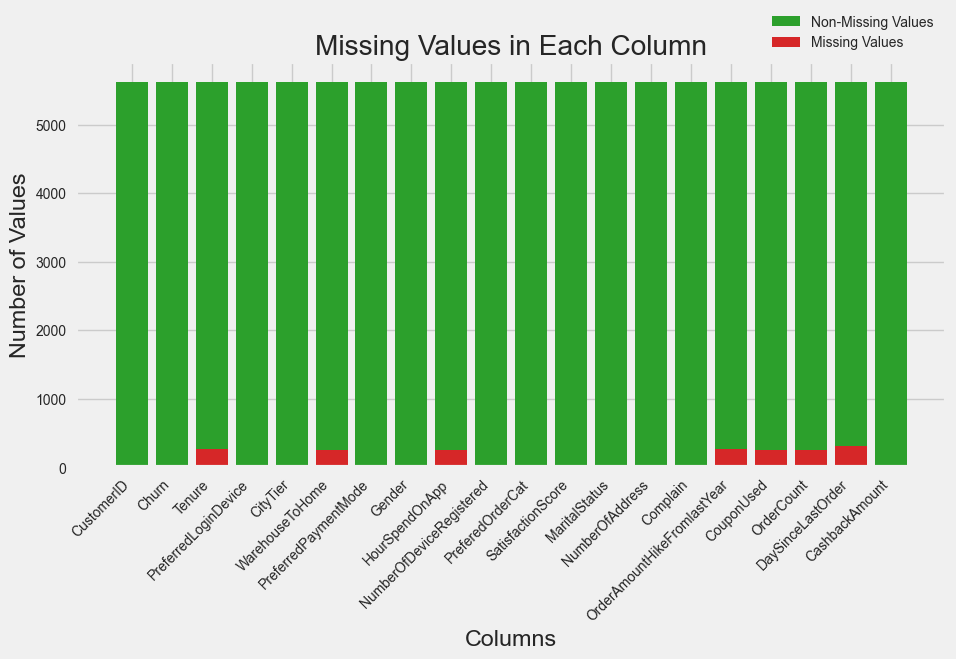

In [415]:
import matplotlib.pyplot as plt
import pandas as pd

total_instances = len(df)
non_null_counts = df.count()

plt.figure(figsize=(10, 5))

plt.bar(non_null_counts.index, total_instances, color="tab:green", label="Non-Missing Values")
plt.bar(non_null_counts.index, total_instances - non_null_counts, color="tab:red", label="Missing Values")

plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Values')
plt.xticks(rotation=45, ha="right")

plt.legend(loc="lower right", bbox_to_anchor=(1, 1))
plt.show()

Sve nedostajuće vrednosti zauzimaju mali udeo u kolonama (manje od 6%), stoga ih možemo popuniti.

Backward fill - rednost nedostajuće celije se popunjava vrednošću iz naredne dostupne celije u istoj koloni.

In [416]:
df['Tenure'] = df['Tenure'].fillna(method = 'bfill')
df['Tenure'].isnull().sum()

0

Strategija 'most_frequent' - nedostajuće vrednosti će se zameniti vrednošću koja se najčešće javlja u toj koloni.

In [417]:
from sklearn.impute import SimpleImputer
s_imp = SimpleImputer(missing_values=np.nan , strategy = 'most_frequent')
df['WarehouseToHome'] = s_imp.fit_transform(pd.DataFrame(df['WarehouseToHome']))
df['WarehouseToHome'].isnull().sum()

0

Zamene nedostajućih vrednosti nasumično odabranim vrednostima iz iste kolone.

In [418]:
fill_list = df['HourSpendOnApp'].dropna()
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(pd.Series(np.random.choice(fill_list , size = len(df['HourSpendOnApp'].index))))
df['HourSpendOnApp'].isnull().sum()

0

Forward fill - popunjava nedostajuće vrednosti vrednostima prethodne dostupne celije u istoj koloni.

In [419]:
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(method = 'ffill')
df['OrderAmountHikeFromlastYear'].isnull().sum()

0

KKNImputer - za zamenu nedostajućih vrednosti koristiti informacije od dva najbliža suseda. 

In [420]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df['CouponUsed']=imputer.fit_transform(df[['CouponUsed']])
df['CouponUsed'].isnull().sum()

0

In [421]:
imputer_2 = KNNImputer(n_neighbors=2)
df['OrderCount']=imputer_2.fit_transform(df[['OrderCount']])
df['OrderCount'].isnull().sum()

0

In [422]:
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(method = 'bfill')
df['DaySinceLastOrder'].isnull().sum()

0

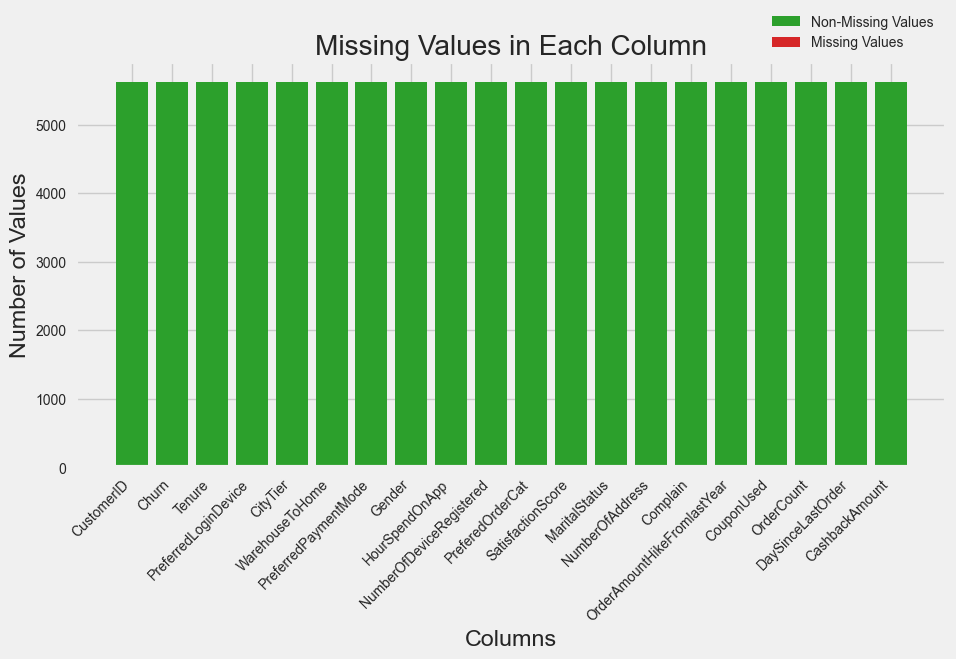

In [423]:
import matplotlib.pyplot as plt
import pandas as pd

total_instances = len(df)
non_null_counts = df.count()

plt.figure(figsize=(10, 5))

plt.bar(non_null_counts.index, total_instances, color="tab:green", label="Non-Missing Values")
plt.bar(non_null_counts.index, total_instances - non_null_counts, color="tab:red", label="Missing Values")

plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Values')
plt.xticks(rotation=45, ha="right")

plt.legend(loc="lower right", bbox_to_anchor=(1, 1))
plt.show()

### Izbacivanje CustomerID kolone

In [424]:
df.drop('CustomerID' , axis = 1 , inplace = True)
df.shape

(5630, 19)

### Tretman Outliera

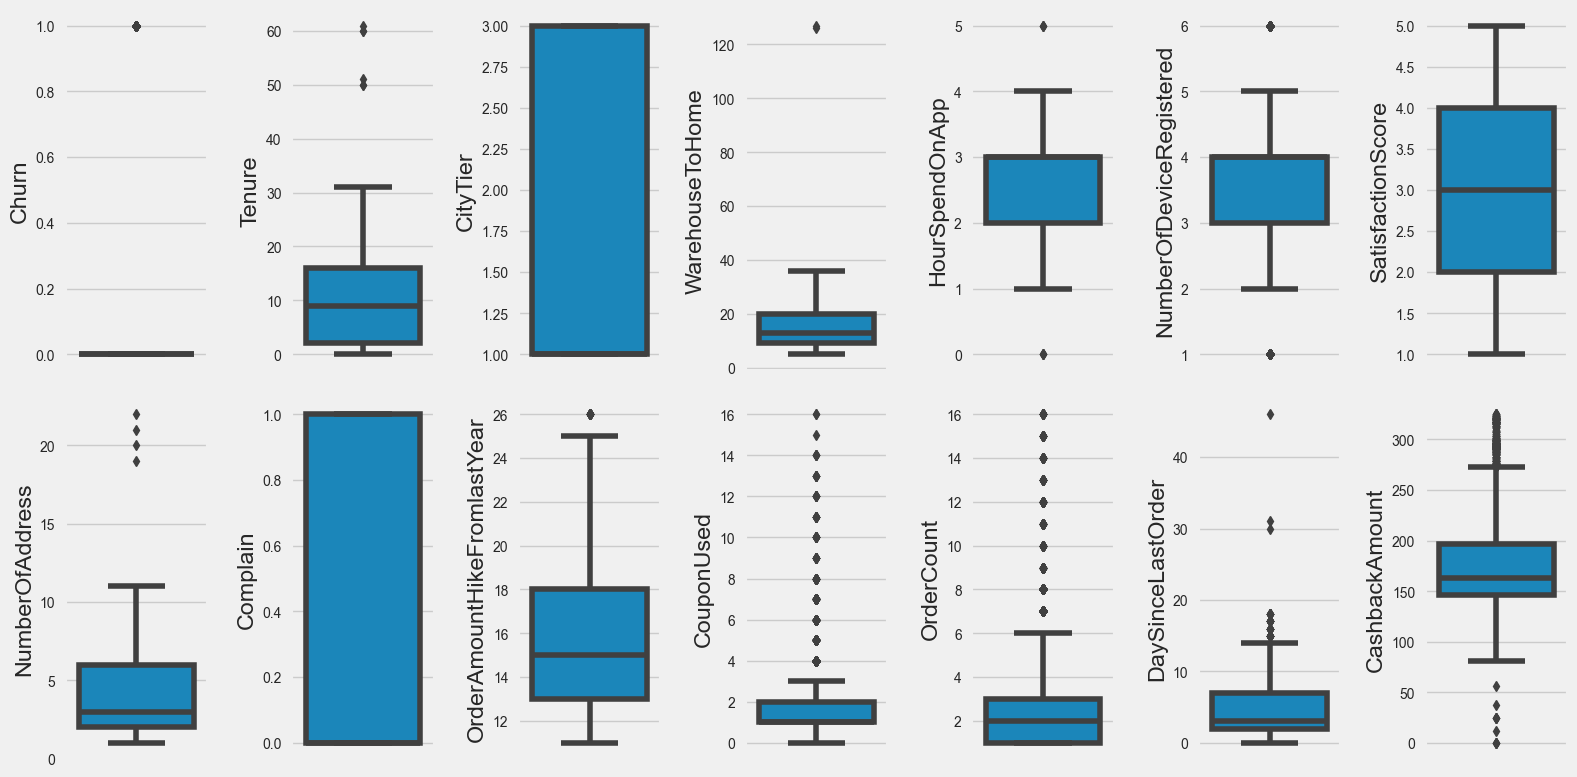

In [425]:
fig, axes = plt.subplots(2, 7, figsize=(16, 8))
numerical_columns = df.select_dtypes(include=['number']).columns

for i, column in enumerate(numerical_columns):
    row = i // 7
    col = i % 7
    sns.boxplot(y=df[column], ax=axes[row, col])

plt.tight_layout()
plt.show()

IRQ metod

In [426]:
def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [427]:
cols_outliers = ['Tenure' , 'WarehouseToHome' , 'NumberOfAddress' , 'DaySinceLastOrder' , 'HourSpendOnApp' , 'NumberOfDeviceRegistered']

for col in cols_outliers:
    df = handle_outliers(df , col)

df.head(10)

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0         Mobile Phone         3              6.0   
1      1     0.0         Mobile Phone         1              8.0   
2      1     0.0         Mobile Phone         1             30.0   
3      1     0.0         Mobile Phone         3             15.0   
4      1     0.0         Mobile Phone         1             12.0   
5      1     0.0             Computer         1             22.0   
6      1    13.0         Mobile Phone         3             11.0   
7      1    13.0         Mobile Phone         1              6.0   
8      1    13.0         Mobile Phone         3              9.0   
9      1     4.0         Mobile Phone         1             31.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4          Credit Card    Male             3.0                         3   
5           Debit Card  Female             3.0                         5   
6     Cash on Delivery    Male             2.0                         3   
7          Credit Card    Male             3.0                         3   
8             E wallet    Male             3.0                         4   
9           Debit Card    Male             2.0                         5   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1        Mobile Phone                  3        Single                7   
2        Mobile Phone                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4        Mobile Phone                  5        Single                3   
5        Mobile Phone                  5        Single                2   
6  Laptop & Accessory                  2      Divorced                4   
7        Mobile Phone                  2      Divorced                3   
8        Mobile Phone                  3      Divorced                2   
9        Mobile Phone                  3        Single                2   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   
5         1                         22.0         4.0         6.0   
6         0                         14.0         0.0         1.0   
7         1                         16.0         2.0         2.0   
8         1                         14.0         0.0         1.0   
9         0                         12.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60  
5                7.0          139.19  
6                0.0          120.86  
7                0.0          122.93  
8                2.0          126.83  
9                1.0          122.93

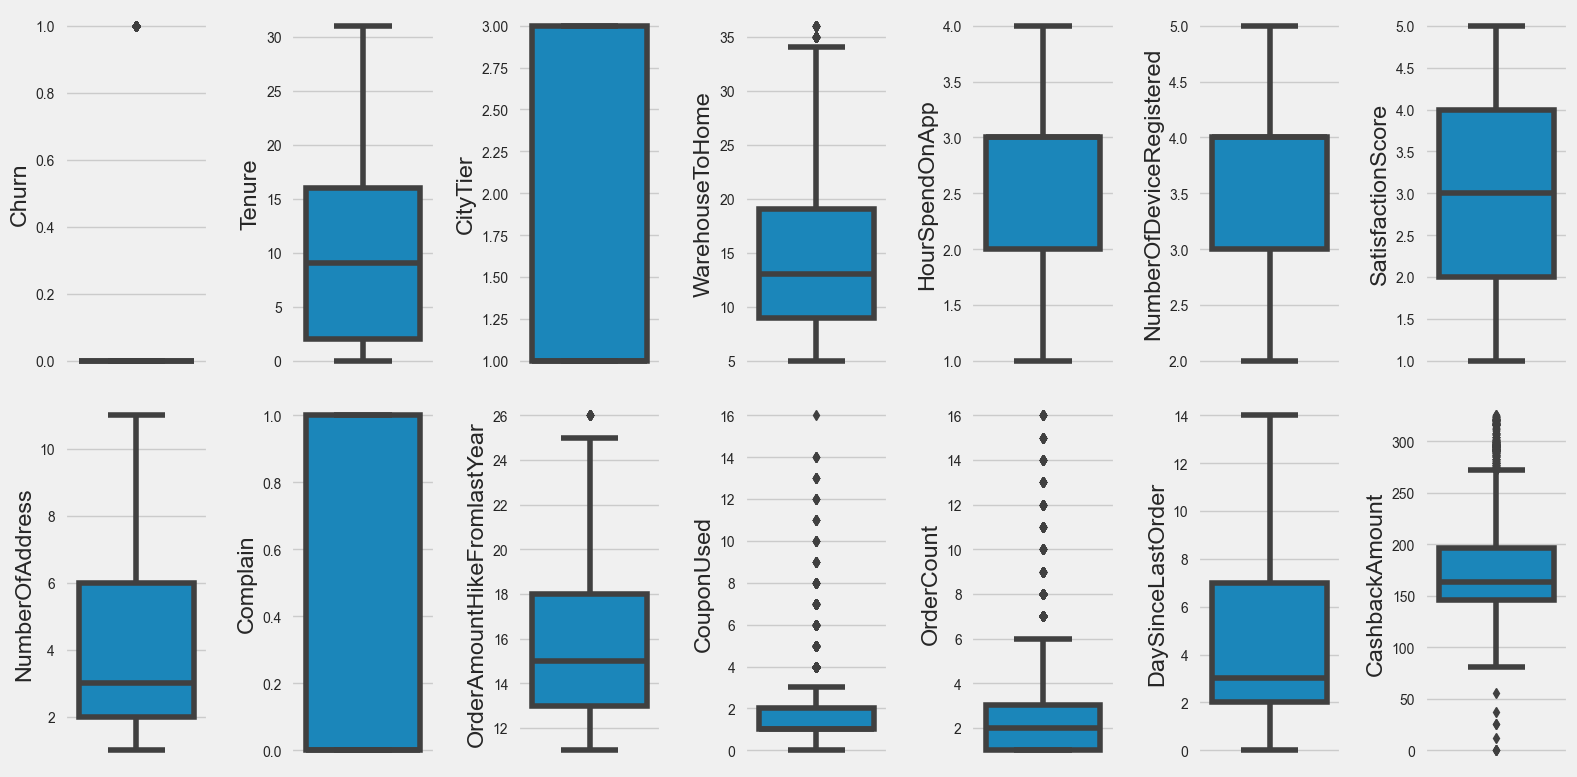

In [428]:
fig, axes = plt.subplots(2, 7, figsize=(16, 8))

for i, column in enumerate(numerical_columns):
    row = i // 7
    col = i % 7
    sns.boxplot(y=df[column], ax=axes[row, col])

plt.tight_layout()
plt.show()

In [429]:
corr_matrix = df.corr()
corr_matrix

Churn    Tenure  CityTier  WarehouseToHome  \
Churn                        1.000000 -0.336058  0.069595         0.054768   
Tenure                      -0.336058  1.000000 -0.065933        -0.011849   
CityTier                     0.069595 -0.065933  1.000000         0.014636   
WarehouseToHome              0.054768 -0.011849  0.014636         1.000000   
HourSpendOnApp              -0.002711 -0.010776 -0.011543         0.079896   
NumberOfDeviceRegistered     0.079116 -0.019592  0.007282         0.029049   
SatisfactionScore            0.108600 -0.013331 -0.009735         0.013783   
NumberOfAddress              0.033703  0.240939 -0.033363         0.001173   
Complain                     0.252346 -0.023903  0.006312         0.022052   
OrderAmountHikeFromlastYear -0.002545  0.017177 -0.022135         0.028927   
CouponUsed                  -0.017914  0.127314  0.017139         0.013175   
OrderCount                  -0.036568  0.181138  0.035656         0.016235   
DaySinceLastOrder           -0.164448  0.164444  0.023394         0.044883   
CashbackAmount              -0.165008  0.453981  0.044946         0.036318   

                             HourSpendOnApp  NumberOfDeviceRegistered  \
Churn                             -0.002711                  0.079116   
Tenure                            -0.010776                 -0.019592   
CityTier                          -0.011543                  0.007282   
WarehouseToHome                    0.079896                  0.029049   
HourSpendOnApp                     1.000000                  0.273574   
NumberOfDeviceRegistered           0.273574                  1.000000   
SatisfactionScore                  0.030293                 -0.001042   
NumberOfAddress                    0.134469                  0.071084   
Complain                          -0.002038                 -0.002056   
OrderAmountHikeFromlastYear        0.097343                  0.061287   
CouponUsed                         0.181588                  0.135974   
OrderCount                         0.105828                  0.092487   
DaySinceLastOrder                  0.085431                  0.026054   
CashbackAmount                     0.118986                  0.120031   

                             SatisfactionScore  NumberOfAddress  Complain  \
Churn                                 0.108600         0.033703  0.252346   
Tenure                               -0.013331         0.240939 -0.023903   
CityTier                             -0.009735        -0.033363  0.006312   
WarehouseToHome                       0.013783         0.001173  0.022052   
HourSpendOnApp                        0.030293         0.134469 -0.002038   
NumberOfDeviceRegistered             -0.001042         0.071084 -0.002056   
SatisfactionScore                     1.000000         0.052405 -0.028580   
NumberOfAddress                       0.052405         1.000000 -0.026825   
Complain                             -0.028580        -0.026825  1.000000   
OrderAmountHikeFromlastYear          -0.021519         0.019536 -0.006918   
CouponUsed                            0.012302         0.042386  0.001597   
OrderCount                            0.011932        -0.002163 -0.007213   
DaySinceLastOrder                    -0.000683        -0.065497 -0.029606   
CashbackAmount                        0.002783         0.193594  0.001805   

                             OrderAmountHikeFromlastYear  CouponUsed  \
Churn                                          -0.002545   -0.017914   
Tenure                                          0.017177    0.127314   
CityTier                                       -0.022135    0.017139   
WarehouseToHome                                 0.028927    0.013175   
HourSpendOnApp                                  0.097343    0.181588   
NumberOfDeviceRegistered                        0.061287    0.135974   
SatisfactionScore                              -0.021519    0.012302   
NumberOfAddress                  

<AxesSubplot: >

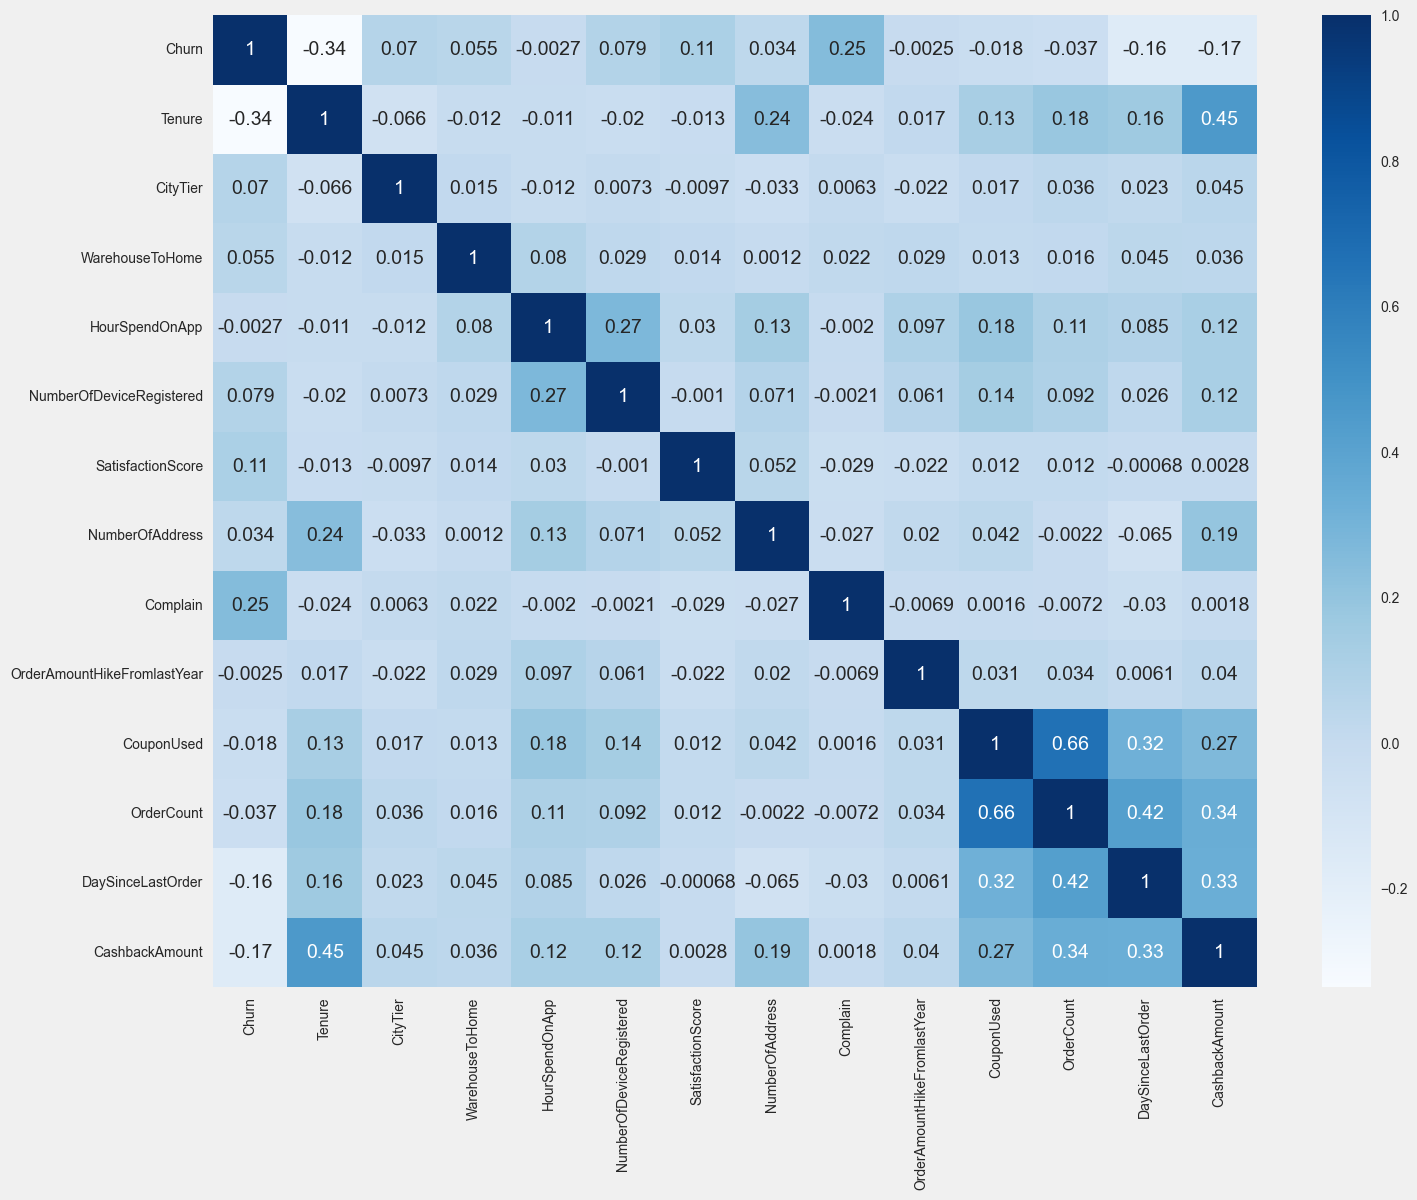

In [430]:
plt.figure(figsize = (15,12))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

### Kodiranje kategoričkih fičera

In [431]:
data = df[df.select_dtypes(exclude=np.number).columns]
data

PreferredLoginDevice PreferredPaymentMode  Gender    PreferedOrderCat  \
0            Mobile Phone           Debit Card  Female  Laptop & Accessory   
1            Mobile Phone                  UPI    Male        Mobile Phone   
2            Mobile Phone           Debit Card    Male        Mobile Phone   
3            Mobile Phone           Debit Card    Male  Laptop & Accessory   
4            Mobile Phone          Credit Card    Male        Mobile Phone   
...                   ...                  ...     ...                 ...   
5625             Computer          Credit Card    Male  Laptop & Accessory   
5626         Mobile Phone          Credit Card    Male             Fashion   
5627         Mobile Phone           Debit Card    Male  Laptop & Accessory   
5628             Computer          Credit Card    Male  Laptop & Accessory   
5629         Mobile Phone          Credit Card    Male  Laptop & Accessory   

     MaritalStatus  
0           Single  
1           Single  
2           Single  
3           Single  
4           Single  
...            ...  
5625       Married  
5626       Married  
5627       Married  
5628       Married  
5629       Married  

[5155 rows x 5 columns]

In [432]:
# import pandas as pd

# df = pd.get_dummies(df, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus'])

# df.head(10)

In [433]:
from sklearn.calibration import LabelEncoder

le = LabelEncoder()

for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

df.head(10)

Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0                     1         3              6.0   
1      1     0.0                     1         1              8.0   
2      1     0.0                     1         1             30.0   
3      1     0.0                     1         3             15.0   
4      1     0.0                     1         1             12.0   
5      1     0.0                     0         1             22.0   
6      1    13.0                     1         3             11.0   
7      1    13.0                     1         1              6.0   
8      1    13.0                     1         3              9.0   
9      1     4.0                     1         1             31.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                     2       0             3.0                         3   
1                     4       1             3.0                         4   
2                     2       1             2.0                         4   
3                     2       1             2.0                         4   
4                     1       1             3.0                         3   
5                     2       0             3.0                         5   
6                     0       1             2.0                         3   
7                     1       1             3.0                         3   
8                     3       1             3.0                         4   
9                     2       1             2.0                         5   

   PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0                 2                  2              2                9   
1                 3                  3              2                7   
2                 3                  3              2                6   
3                 2                  5              2                8   
4                 3                  5              2                3   
5                 3                  5              2                2   
6                 2                  2              0                4   
7                 3                  2              0                3   
8                 3                  3              0                2   
9                 3                  3              2                2   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   
5         1                         22.0         4.0         6.0   
6         0                         14.0         0.0         1.0   
7         1                         16.0         2.0         2.0   
8         1                         14.0         0.0         1.0   
9         0                         12.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60  
5                7.0          139.19  
6                0.0          120.86  
7                0.0          122.93  
8                2.0          126.83  
9                1.0          122.93

In [434]:
df.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice             int32
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode             int32
Gender                           int32
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                 int32
SatisfactionScore                int64
MaritalStatus                    int32
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

## Klasterizacija

### Skaliranje

In [435]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df.describe()

Churn        Tenure  PreferredLoginDevice      CityTier  \
count  5.155000e+03  5.155000e+03          5.155000e+03  5.155000e+03   
mean  -7.443125e-17  6.616111e-17          1.071672e-16 -1.371465e-16   
std    1.000097e+00  1.000097e+00          1.000097e+00  1.000097e+00   
min   -4.484103e-01 -1.202189e+00         -1.561717e+00 -7.193568e-01   
25%   -4.484103e-01 -9.648137e-01         -1.561717e+00 -7.193568e-01   
50%   -4.484103e-01 -1.339987e-01          6.403210e-01 -7.193568e-01   
75%   -4.484103e-01  6.968163e-01          6.403210e-01  1.461987e+00   
max    2.230101e+00  2.477134e+00          6.403210e-01  1.461987e+00   

       WarehouseToHome  PreferredPaymentMode        Gender  HourSpendOnApp  \
count     5.155000e+03          5.155000e+03  5.155000e+03    5.155000e+03   
mean      9.924166e-17         -3.549268e-17 -9.751872e-17    8.821481e-17   
std       1.000097e+00          1.000097e+00  1.000097e+00    1.000097e+00   
min      -1.262534e+00         -1.732428e+00 -1.219317e+00   -2.688832e+00   
25%      -7.703713e-01         -7.475729e-01 -1.219317e+00   -1.300796e+00   
50%      -2.782082e-01          2.372823e-01  8.201312e-01    8.724030e-02   
75%       4.600364e-01          2.372823e-01  8.201312e-01    8.724030e-02   
max       2.551730e+00          2.206993e+00  8.201312e-01    1.475277e+00   

       NumberOfDeviceRegistered  PreferedOrderCat  SatisfactionScore  \
count              5.155000e+03      5.155000e+03       5.155000e+03   
mean              -8.821481e-17      4.824247e-17       1.654028e-17   
std                1.000097e+00      1.000097e+00       1.000097e+00   
min               -2.180469e+00     -1.898192e+00      -1.500199e+00   
25%               -9.272282e-01     -8.309650e-02      -7.734321e-01   
50%                3.260128e-01     -8.309650e-02      -4.666533e-02   
75%                3.260128e-01      8.244511e-01       6.801014e-01   
max                1.579254e+00      1.731999e+00       1.406868e+00   

       MaritalStatus  NumberOfAddress      Complain  \
count   5.155000e+03     5.155000e+03  5.155000e+03   
mean    9.924166e-17    -1.433491e-16  6.753946e-17   
std     1.000097e+00     1.000097e+00  1.000097e+00   
min    -1.745178e+00    -1.257010e+00 -6.324985e-01   
25%    -2.497670e-01    -8.666320e-01 -6.324985e-01   
50%    -2.497670e-01    -4.762538e-01 -6.324985e-01   
75%     1.245644e+00     6.948807e-01  1.581031e+00   
max     1.245644e+00     2.646772e+00  1.581031e+00   

       OrderAmountHikeFromlastYear    CouponUsed    OrderCount  \
count                 5.155000e+03  5.155000e+03  5.155000e+03   
mean                  1.874565e-16  6.616111e-17 -1.102685e-16   
std                   1.000097e+00  1.000097e+00  1.000097e+00   
min                  -1.277801e+00 -9.589099e-01 -7.051992e-01   
25%                  -7.339100e-01 -4.079831e-01 -7.051992e-01   
50%                  -1.900190e-01 -4.079831e-01 -3.459376e-01   
75%                   6.258176e-01  1.429436e-01  1.619959e-02   
max                   2.801382e+00  7.855918e+00  4.683724e+00   

       DaySinceLastOrder  CashbackAmount  
count       5.155000e+03     5155.000000  
mean        7.718796e-17        0.000000  
std         1.000097e+00        1.000097  
min        -1.320033e+00       -3.637204  
25%        -7.232280e-01       -0.639492  
50%        -4.248255e-01       -0.280243  
75%         7.687843e-01        0.394273  
max         2.857601e+00        3.041986

### Procena i izbor optimalnog broja klastera za KMeans

U svrhu izbora optimalnog broja klastera, upotrebljene su dve metode: Elbow metoda i Silhouette koeficijent

#### Elbow metoda

In [436]:
from sklearn.cluster import KMeans

kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
 }

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

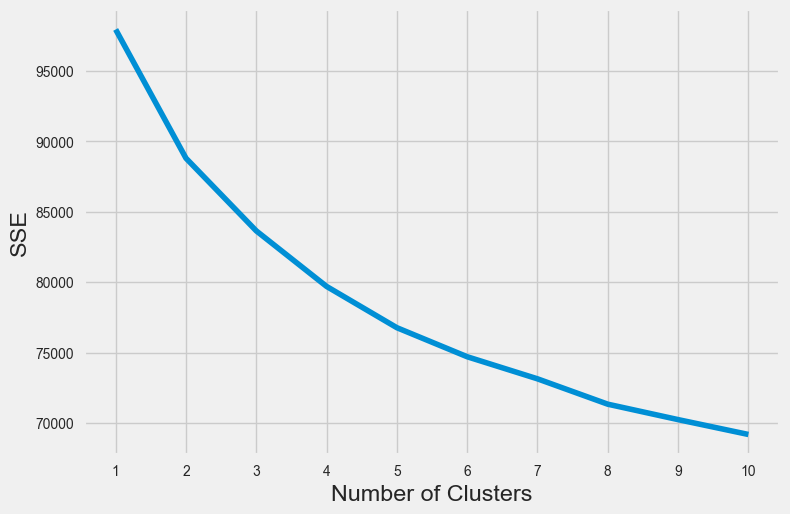

In [437]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [438]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

Elbow metoda daje procenu da je 3 optimalan broj klastera.

#### Silhouette koeficijent

In [439]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,  random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)

In [440]:
print(silhouette_coefficients)

[0.11069061711058431, 0.09676962307306035, 0.08761581587715597, 0.07409559933729543, 0.0558468356049952, 0.06331705847684098, 0.06081838979147402, 0.05697970164295252, 0.05637704069580922]


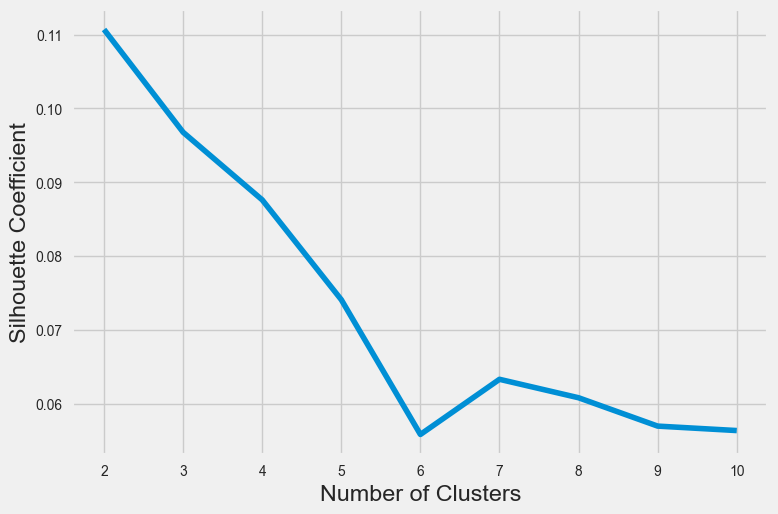

In [441]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Silhouette koeficijent ima najveću vrednost za 2 klastera, te zaključujemo da je po ovoj metodi to optimalan broj.

### Procena i izbor optimalnog broja klastera za KMeans- yellowbrick

In [442]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

def elbowDist(df: pd.DataFrame):
    elbow = KElbowVisualizer(KMeans(), k=(2,12))
    elbow.fit(df)
    elbow.show()

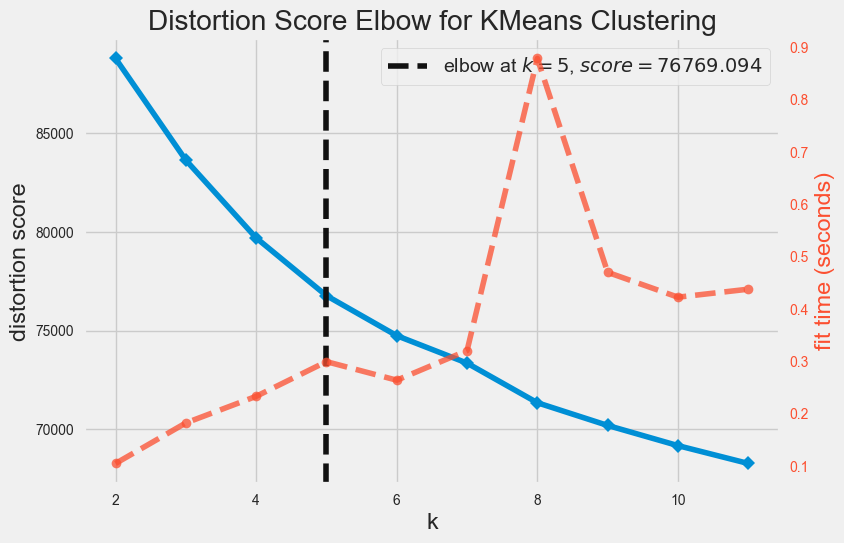

In [443]:
elbowDist(df)

In [444]:
def elbowCH(df: pd.DataFrame):
    elbow = KElbowVisualizer(KMeans(), k=(2,12), metric='calinski_harabasz')
    elbow.fit(df)
    elbow.show()

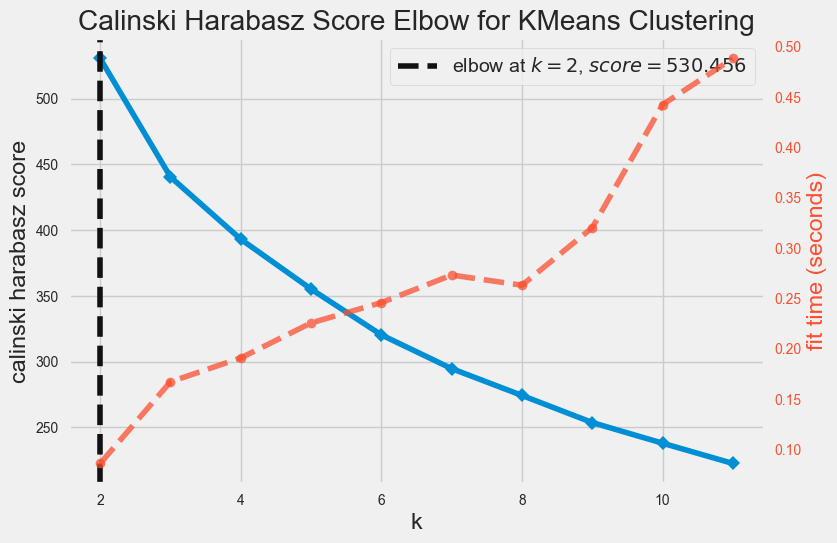

In [445]:
elbowCH(df)

In [446]:
def elbowSil(df: pd.DataFrame):
    elbow = KElbowVisualizer(KMeans(), k=(2,12), metric='silhouette')
    elbow.fit(df)
    elbow.show()

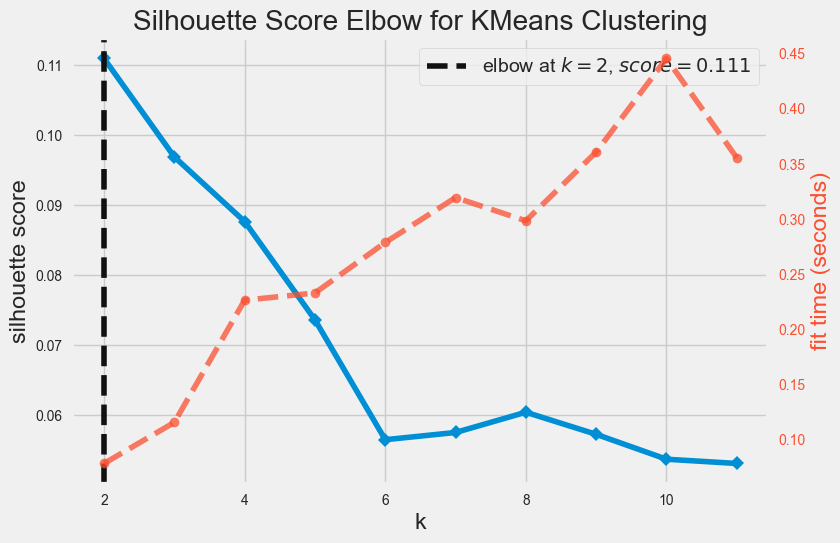

In [447]:
elbowSil(df)

### PCA predobrada

U slučajevima kada nema koncentracije podataka ili jasne separacije po grupama, preporučuje se pokušaj smanjenja dimenzija podataka pomoću PCA metode.

In [448]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit_transform(df)
pca.explained_variance_ratio_.cumsum()

array([0.14066355, 0.22229178, 0.29369285, 0.36307558, 0.42350896,
       0.47972628, 0.53494468, 0.58888245, 0.64115012, 0.6913771 ])

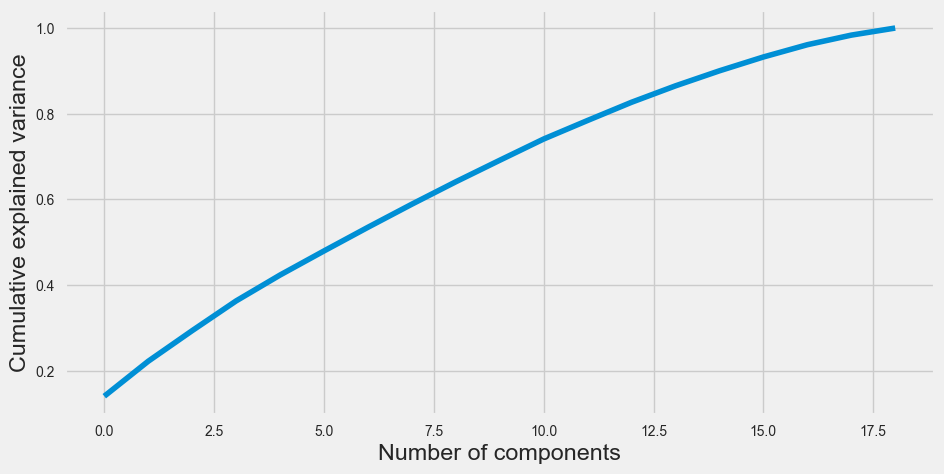

In [449]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)
data_pca = pca.transform(df)
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

S obzirom da prvih 15 PCA dimenzija objašnjavaju 90% podataka, opredeljujemo se za primenu PCA sa 15 komponenata.

In [450]:
pca = PCA(n_components=15)
X_pca = pca.fit_transform(df)

### K-Means Clustering

#### K_Means - 2 klastera

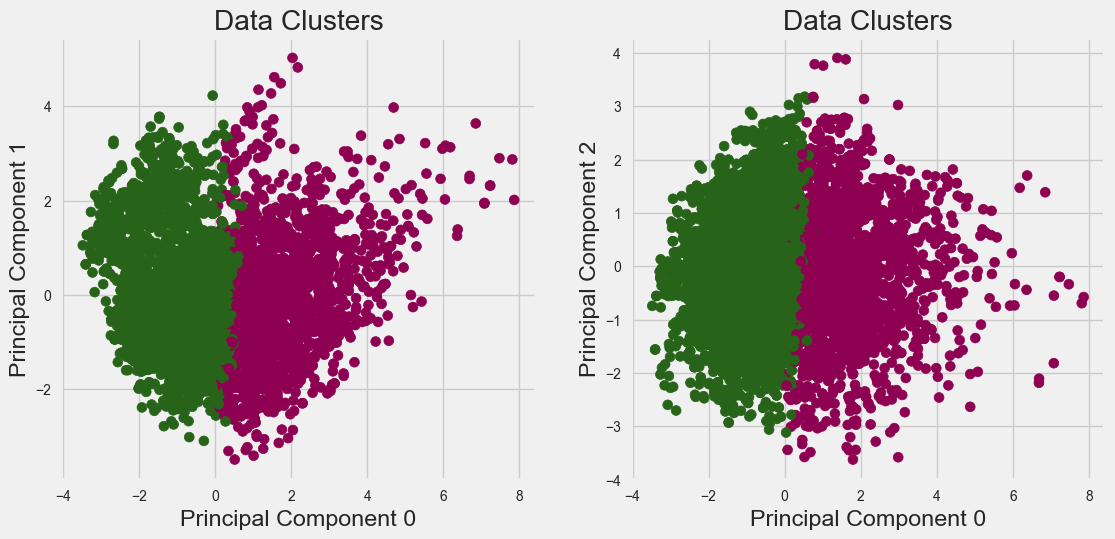

In [451]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df)

plt.figure(figsize=(12, 12))

for i, y in enumerate((1,2), 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_pca[:, 0], X_pca[:, y], c=clusters, cmap='PiYG', s=50)
    plt.title(f'Data Clusters')
    plt.xlabel(f'Principal Component {0}')
    plt.ylabel(f'Principal Component {y}')

In [452]:
# print(kmeans.cluster_centers_)

# points=X_pca
# y_km = kmeans.fit_predict(points)

# plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, cmap='PiYG')
# plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, cmap='PiYG')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


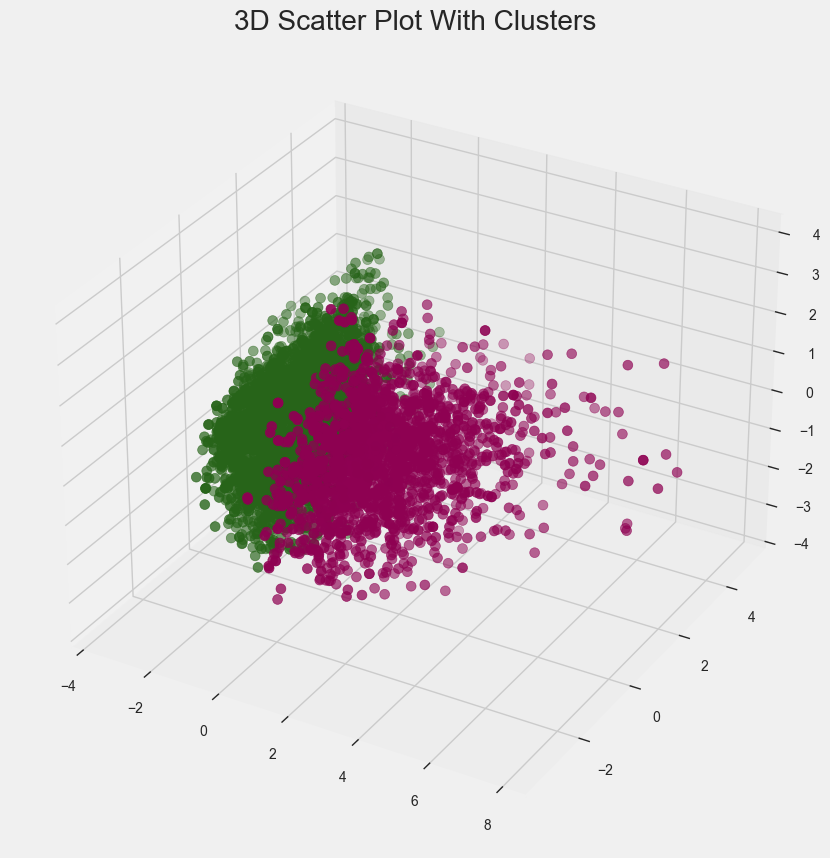

In [453]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='PiYG', s=50)
ax.set_title('3D Scatter Plot With Clusters')

plt.legend()
plt.show()

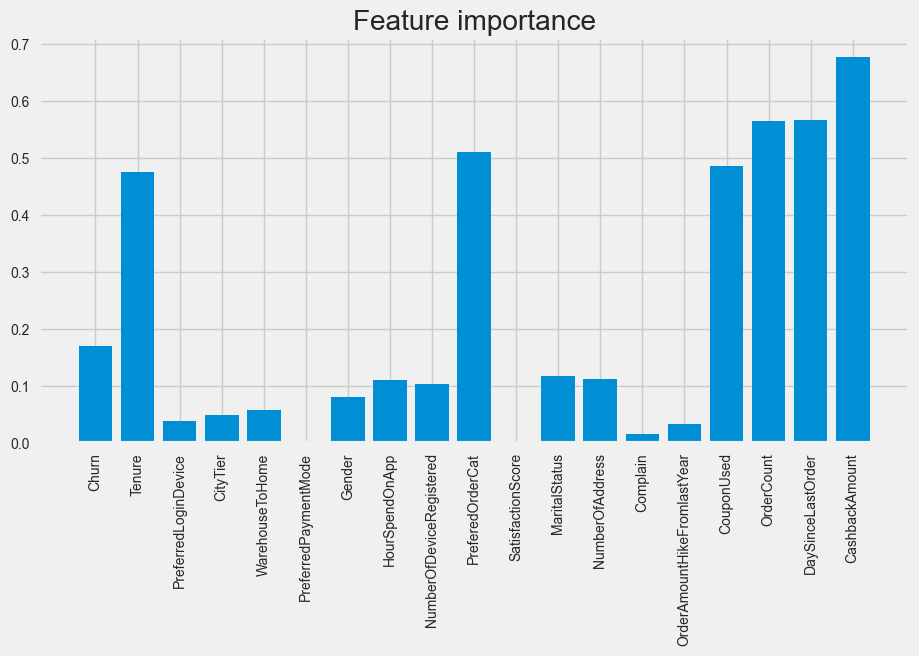

In [454]:
cent = kmeans.cluster_centers_
feature_importance = cent.std(axis=0)
plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance')
plt.show()

In [455]:
important_columns = df.columns[feature_importance > 0.2]
print(important_columns)

Index(['Tenure', 'PreferedOrderCat', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')


In [468]:
cluster_data = np.array(
    [df[clusters == i][important_columns].mean(axis=0) for i in range(2)])
cluster_data = pd.DataFrame(
    cluster_data.T, columns=range(2), index=important_columns)
if 'Tenure' in cluster_data.index:
    cluster_data.loc['CashBackAmount'] = cluster_data.loc['Tenure']+\
        cluster_data.loc['PreferedOrderCat']+cluster_data.loc['CouponUsed'] + \
        cluster_data.loc['OrderCount'] + cluster_data.loc['DaySinceLastOrder'] 
cluster_data

0         1
Tenure             1.010225 -0.832247
PreferedOrderCat  -0.750167  0.397513
CouponUsed        -0.059426 -0.286171
OrderCount        -0.052129 -0.335287
DaySinceLastOrder  0.447661 -0.561593
CashbackAmount     1.261922 -0.526754
CashBackAmount     0.596163 -1.617785

Klaster 0 - aktivniji korisnici koji su više kupovali, koristili više kupona, duže članovi, više poručivali itd.
Klaster 1 - manje aktivni korisnici, koji su manje radili sve to

In [458]:
df['Cluster'] = clusters

# Calculate mean values for each feature within each cluster
cluster_feature_means = df.groupby('Cluster').mean()

# Display the DataFrame
print(cluster_feature_means)

            Churn    Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
Cluster                                                                        
0       -0.215930  0.604609              0.049359  0.062349         0.073421   
1        0.123746 -0.346492             -0.028287 -0.035732        -0.042077   

         PreferredPaymentMode    Gender  HourSpendOnApp  \
Cluster                                                   
0                   -0.003950 -0.101856        0.141195   
1                    0.002263  0.058372       -0.080917   

         NumberOfDeviceRegistered  PreferedOrderCat  SatisfactionScore  \
Cluster                                                                  
0                        0.131821         -0.649468          -0.001001   
1                       -0.075544          0.372200           0.000573   

         MaritalStatus  NumberOfAddress  Complain  \
Cluster                                             
0            -0.149436         0.143820

#### K-Means - 3 klastera

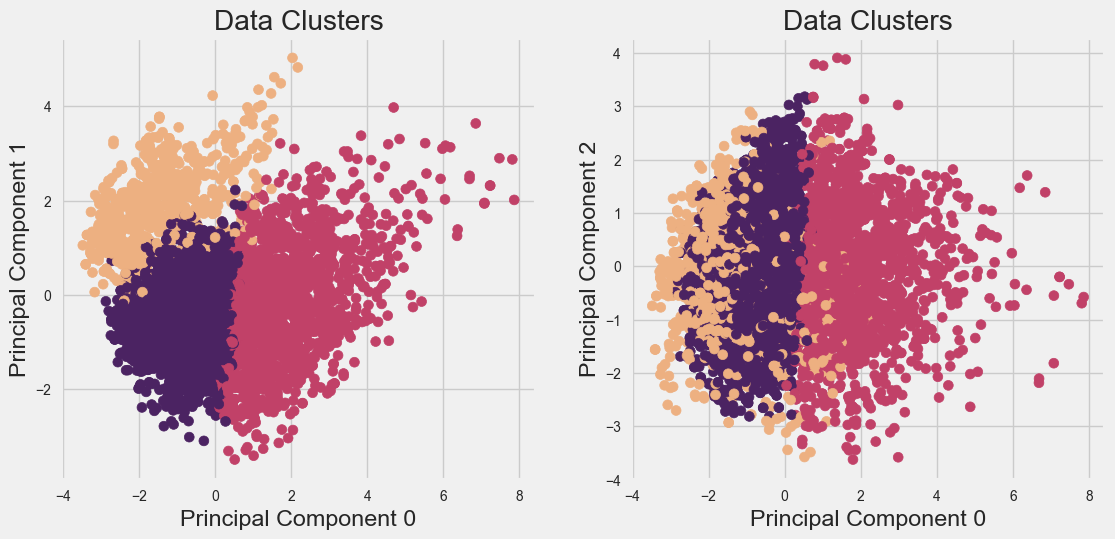

In [459]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df)

plt.figure(figsize=(12, 12))

for i, y in enumerate((1,2), 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_pca[:, 0], X_pca[:, y], c=clusters, cmap='flare', s=50)
    plt.title(f'Data Clusters')
    plt.xlabel(f'Principal Component {0}')
    plt.ylabel(f'Principal Component {y}')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


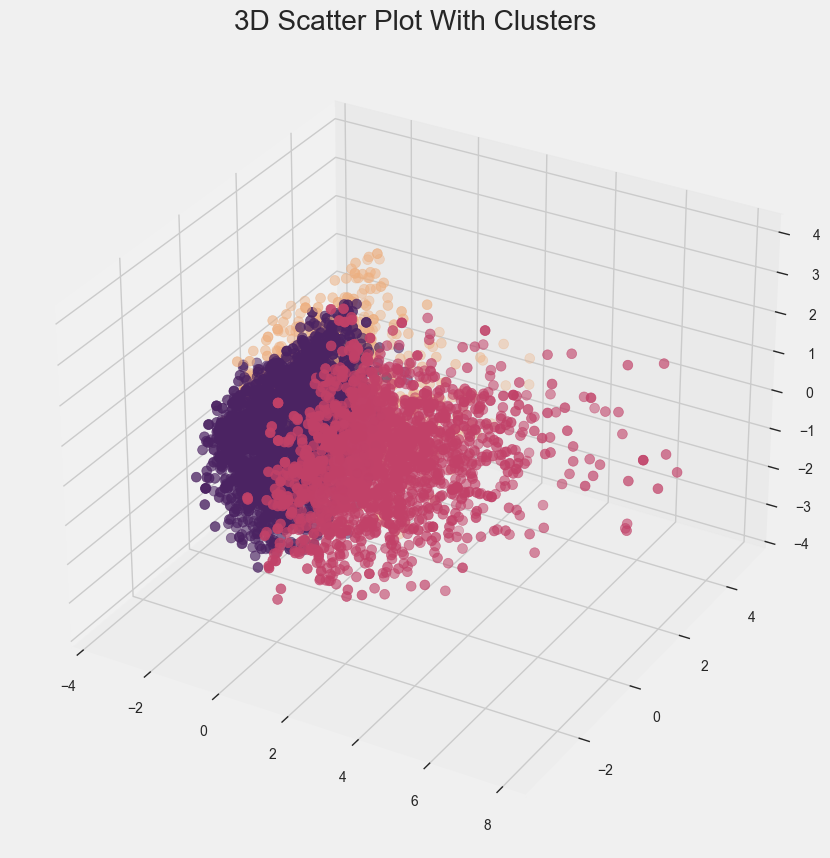

In [460]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='flare', s=50)
ax.set_title('3D Scatter Plot With Clusters')

plt.legend()
plt.show()

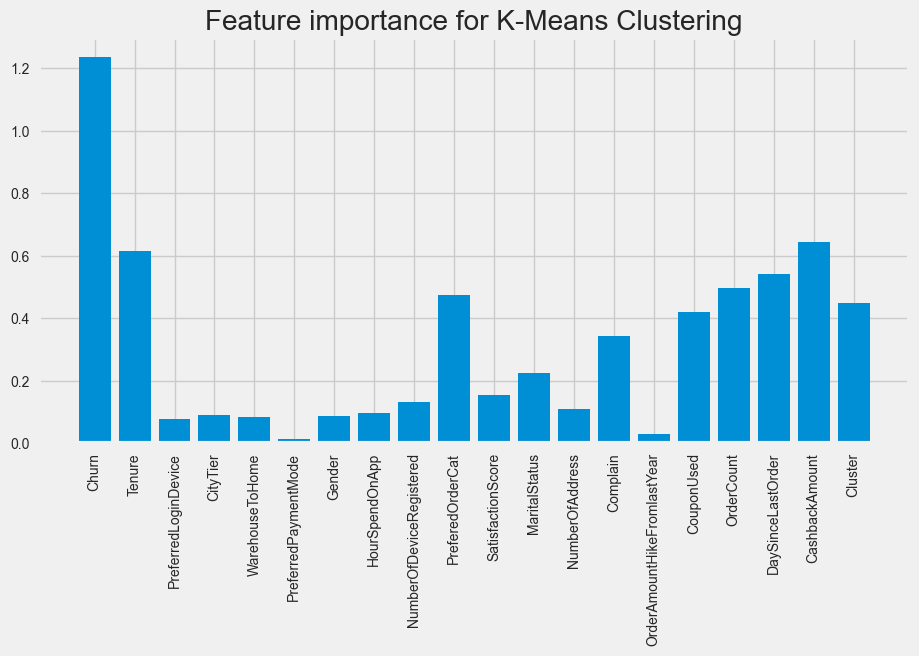

In [461]:
cent = kmeans.cluster_centers_
feature_importance = cent.std(axis=0)
plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance for K-Means Clustering')
plt.show()

In [462]:
cluster_data = np.array(
    [df[clusters == i][important_columns].mean(axis=0) for i in range(3)])
cluster_data = pd.DataFrame(
    cluster_data.T, columns=range(3), index=important_columns)
if 'Tenure' in cluster_data.index:
    cluster_data.loc['Churn'] = cluster_data.loc['Tenure']+ \
        cluster_data.loc['PreferedOrderCat']+cluster_data.loc['CouponUsed'] + \
        cluster_data.loc['OrderCount'] + cluster_data.loc['DaySinceLastOrder'] + cluster_data.loc['CashbackAmount'] 
cluster_data

0         1         2
Tenure            -0.836868  0.665096 -0.209578
PreferedOrderCat   0.366035 -0.652082  0.343384
CouponUsed        -0.193458  0.601220 -0.360305
OrderCount        -0.254489  0.710792 -0.418150
DaySinceLastOrder -0.493130  0.722263 -0.353728
CashbackAmount    -0.500917  0.881688 -0.462473
Churn             -1.912827  2.928976 -1.460850

Klaster 0 - duze na platformi, koristi kupone, veci broj narudzbina, veci povracaj novca, napustio usluge kompanije
Klaster 1 - krace na platformi, manje porudzbina, najvise dana od poslednje porudzbine, nije napustio usluge
Klaster 2 - jos gore od Klastera 1

#### K-Means - 5 klastera

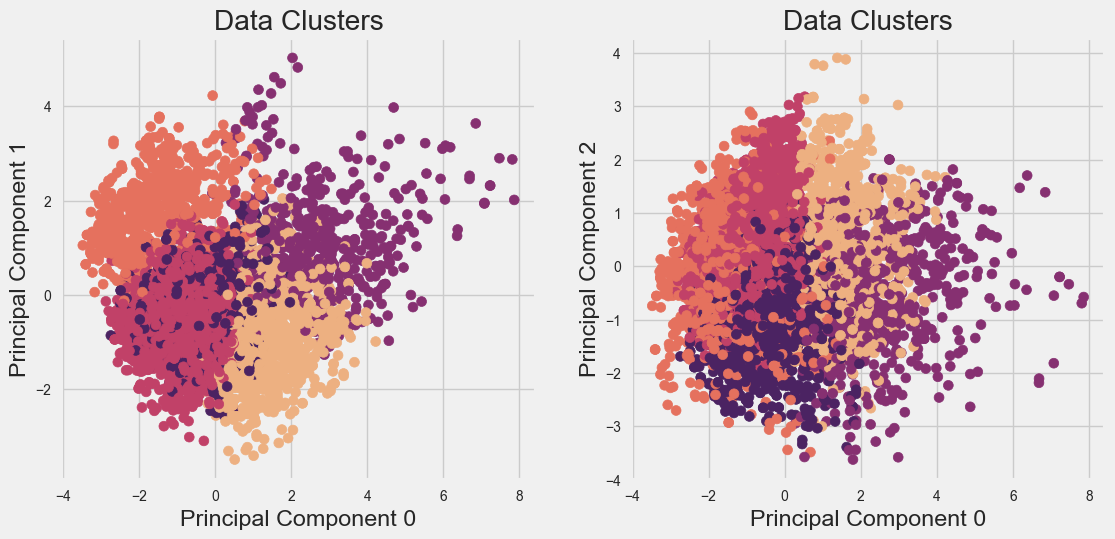

In [463]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df)

plt.figure(figsize=(12, 12))

for i, y in enumerate((1,2), 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_pca[:, 0], X_pca[:, y], c=clusters, cmap='flare', s=50)
    plt.title(f'Data Clusters')
    plt.xlabel(f'Principal Component {0}')
    plt.ylabel(f'Principal Component {y}')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


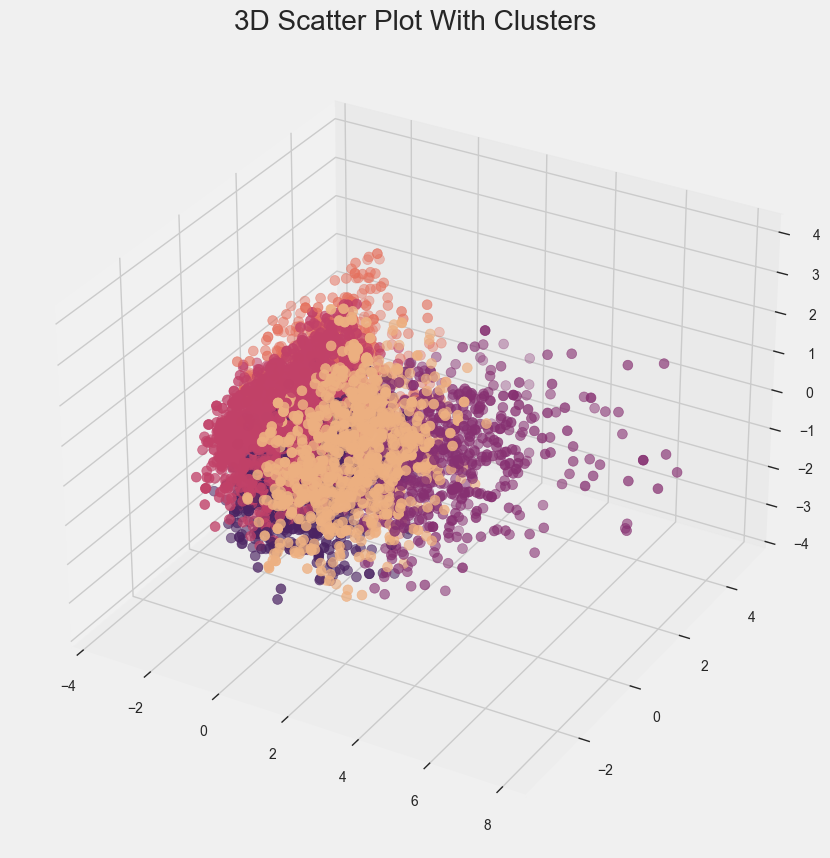

In [464]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='flare', s=50)
ax.set_title('3D Scatter Plot With Clusters')

plt.legend()
plt.show()

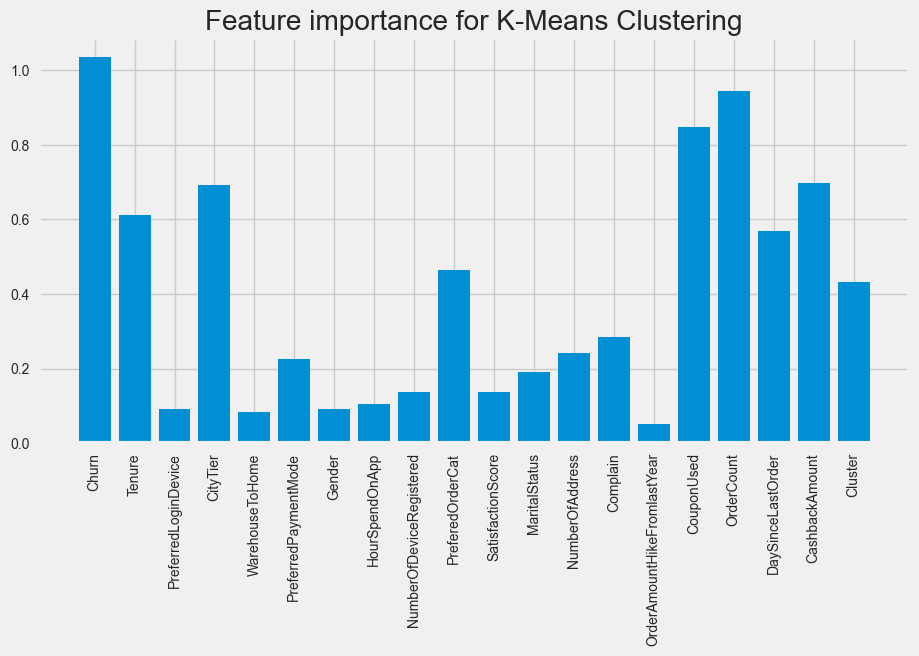

In [465]:
cent = kmeans.cluster_centers_
feature_importance = cent.std(axis=0)
plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance for K-Means Clustering')
plt.show()

In [466]:
cluster_data = np.array(
    [df[clusters == i][important_columns].mean(axis=0) for i in range(5)])
cluster_data = pd.DataFrame(
    cluster_data.T, columns=range(5), index=important_columns)
if 'Tenure' in cluster_data.index:
    cluster_data.loc['Churn'] = cluster_data.loc['Tenure']  + \
        cluster_data.loc['CouponUsed'] + \
        cluster_data.loc['OrderCount'] + cluster_data.loc['DaySinceLastOrder'] + cluster_data.loc['CashbackAmount'] 
cluster_data

0         1         2         3         4
Tenure             1.010225 -0.832247 -0.178622  0.266825 -0.231756
PreferedOrderCat  -0.750167  0.397513  0.461533 -0.398704 -0.131203
CouponUsed        -0.059426 -0.286171 -0.341184  1.853230 -0.320230
OrderCount        -0.052129 -0.335287 -0.388498  2.061819 -0.341159
DaySinceLastOrder  0.447661 -0.561593 -0.314128  1.016915 -0.118514
CashbackAmount     1.261922 -0.526754 -0.549799  0.520962 -0.203478
Churn              2.608252 -2.542052 -1.772231  5.719751 -1.215137

Klaster 0 - izuzetno kratak staz i koriscenje usluga kompanije, mali broj porudzbina, najduze vreme od poslednje porudzbine, mali povracaj novca, ne prestaju da koriste uslige kompanije
Klaster 1 - izuzetno dugacak staz, ne koristi kupone, kratko vreme od poslednje porudzbine, veliki ppvracaj novca, prestaje da koristi uslige kompanije ...
Klaster 2 - srednje dugacak staz, malo kupona, mali broj porudzbina, verovatno ne prestaju da koriste uslige kompanije
Klaster 3 - srednje dugacak staz, izuzetno visok broj porudzbina, veliki povracaj novca, velika sansa za odustanak i prestanak usliga kompanije
Klaster 4 - srednje dugacak staz, mali broj porudzbina, verovatno ne prestaju da koriste uslige kompanije

### Procena i izbor optimalnog broja klastera za Agglomerative

### Agglomerative Clustering

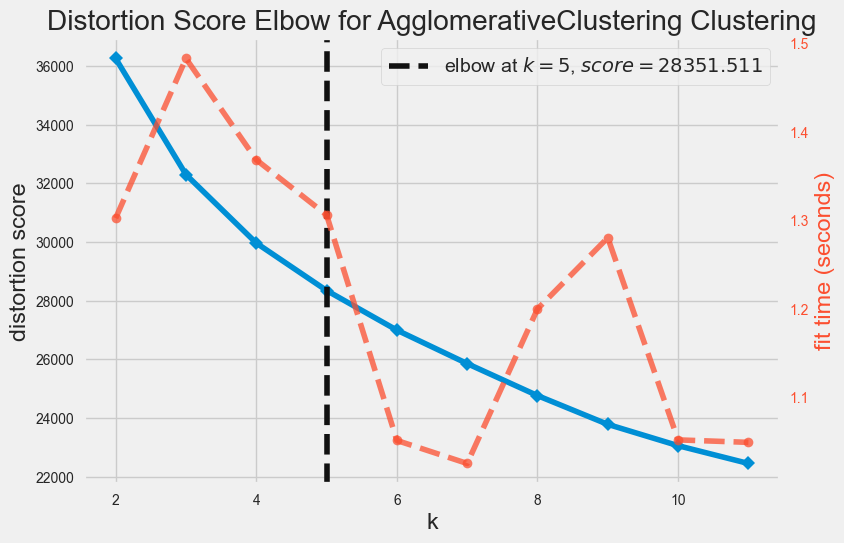

<AxesSubplot: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import AgglomerativeClustering

elbow = KElbowVisualizer(AgglomerativeClustering(), k=(2,12))
elbow.fit(df)
elbow.show()

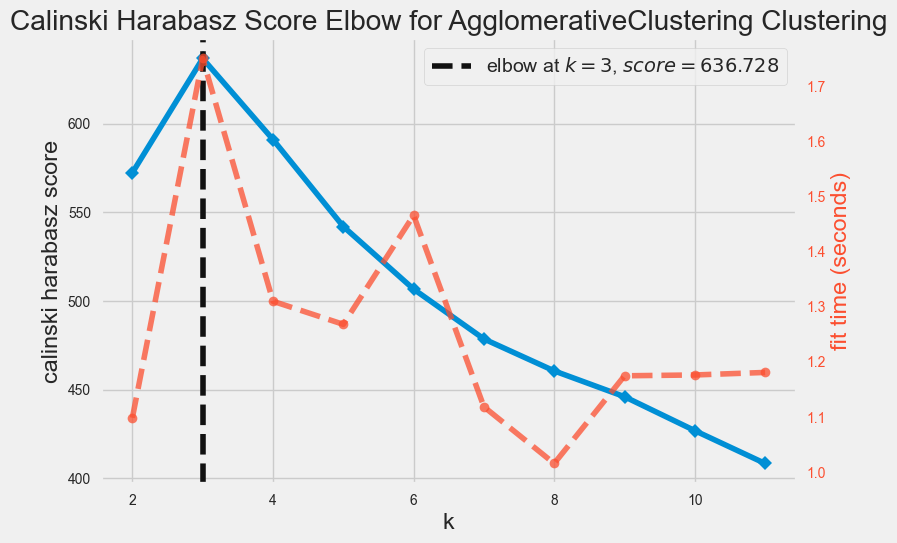

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
elbow = KElbowVisualizer(AgglomerativeClustering(), k=(2,12), metric='calinski_harabasz')
elbow.fit(df)
elbow.show()

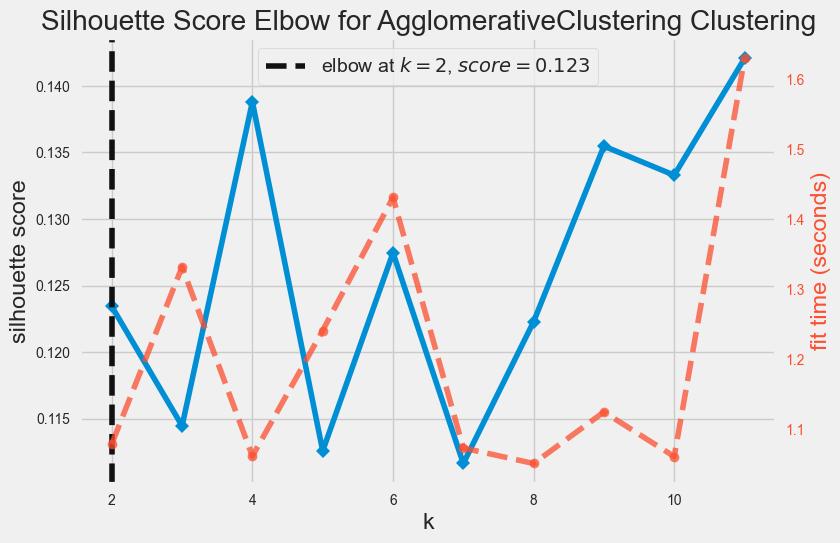

<AxesSubplot: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
elbow = KElbowVisualizer(AgglomerativeClustering(), k=(2,12), metric='silhouette')
elbow.fit(df)
elbow.show()

#### Agglomerative - 2 klastera

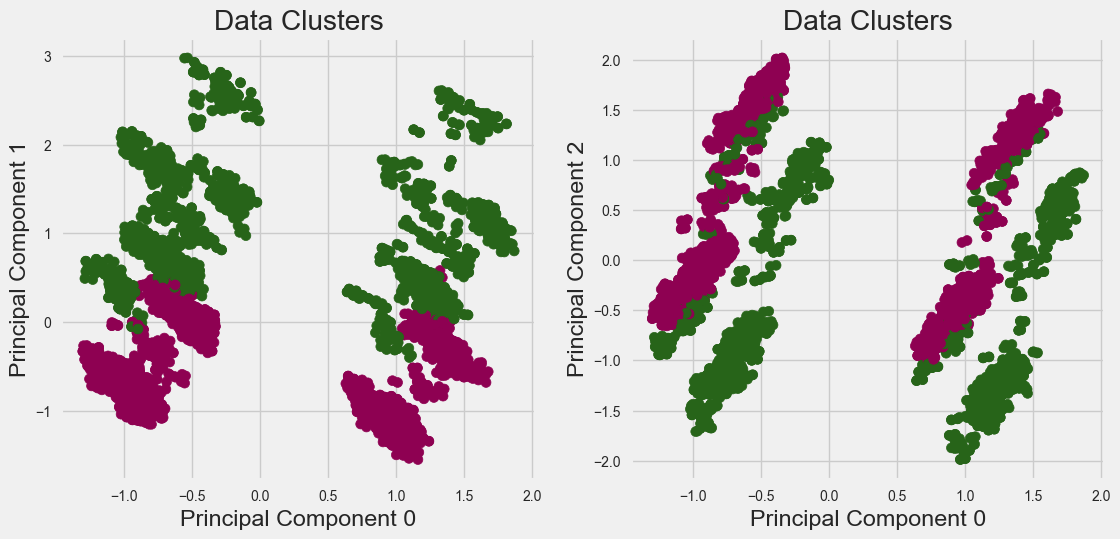

In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=2)
clusters = agglomerative.fit_predict(df)

plt.figure(figsize=(12, 12))

for i, y in enumerate((1,2), 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_pca[:, 0], X_pca[:, y], c=clusters, cmap='PiYG', s=50)
    plt.title(f'Data Clusters')
    plt.xlabel(f'Principal Component {0}')
    plt.ylabel(f'Principal Component {y}')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


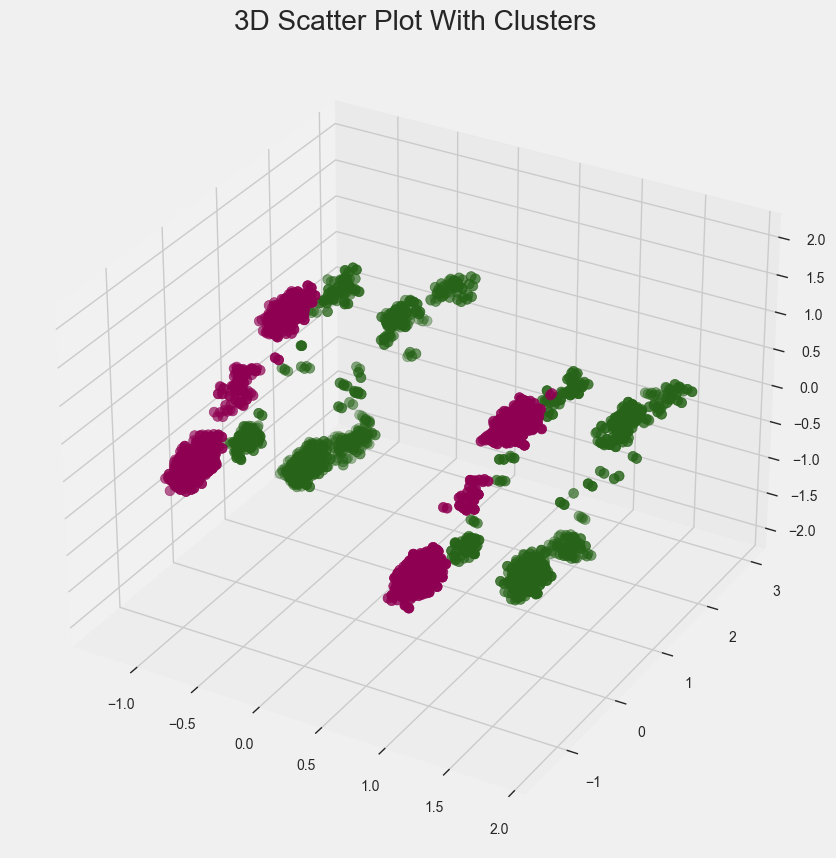

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='PiYG', s=50)
ax.set_title('3D Scatter Plot With Clusters')

plt.legend()
plt.show()

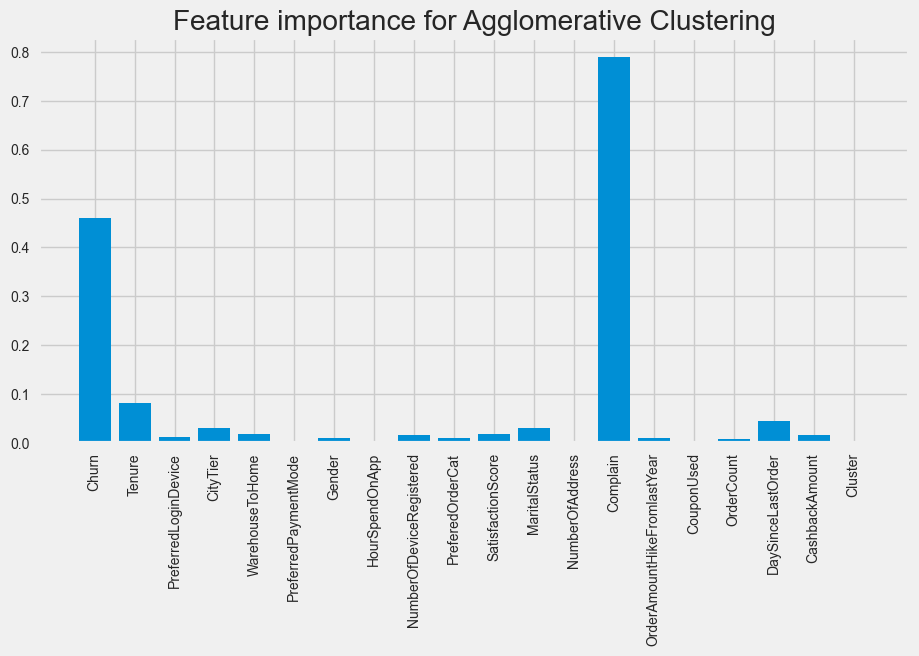

In [ ]:
cent = np.array([df.loc[agglomerative.labels_ == label].mean(axis=0) for label in np.unique(agglomerative.labels_)])

feature_importance = cent.std(axis=0)

plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance for Agglomerative Clustering')
plt.show()

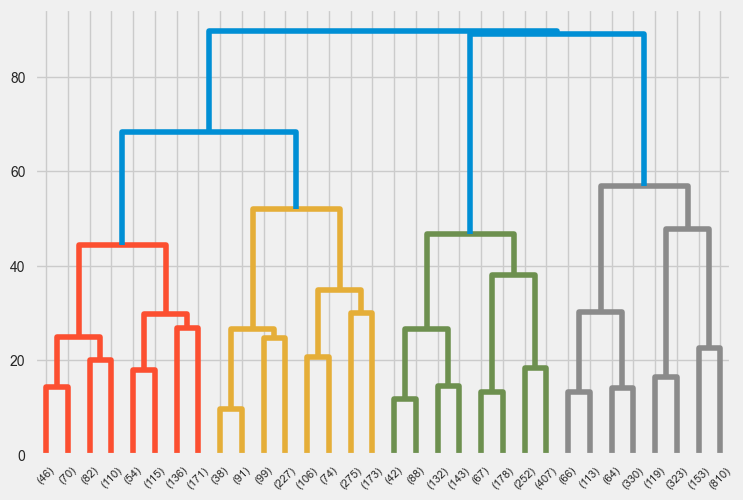

In [ ]:
import scipy.cluster.hierarchy as sch

X = df.values
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), truncate_mode='level', p=4)

#### Agglomerative - 5 klastera

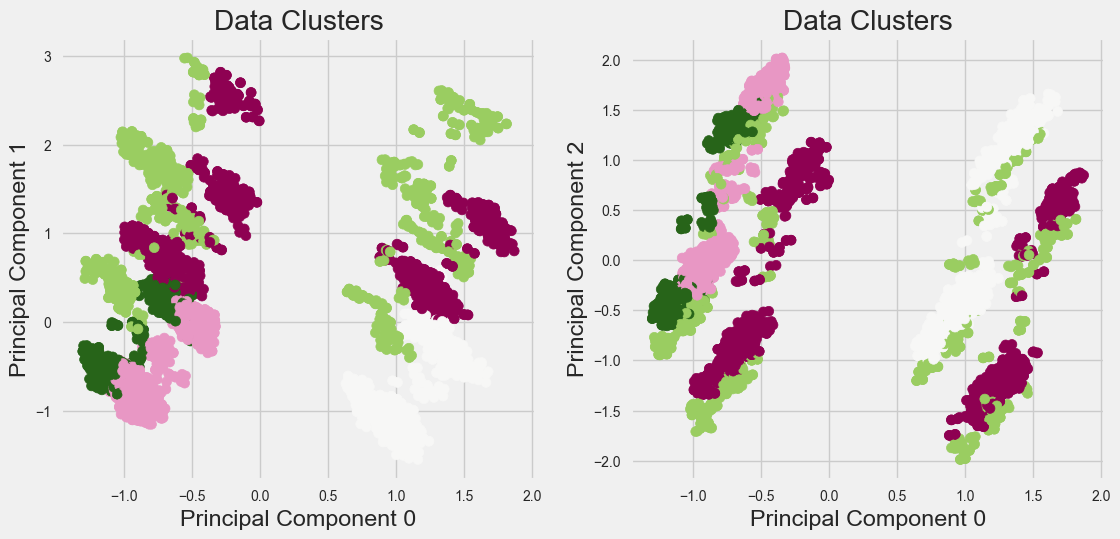

In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=5)
clusters = agglomerative.fit_predict(df)

plt.figure(figsize=(12, 12))

for i, y in enumerate((1,2), 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_pca[:, 0], X_pca[:, y], c=clusters, cmap='PiYG', s=50)
    plt.title(f'Data Clusters')
    plt.xlabel(f'Principal Component {0}')
    plt.ylabel(f'Principal Component {y}')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


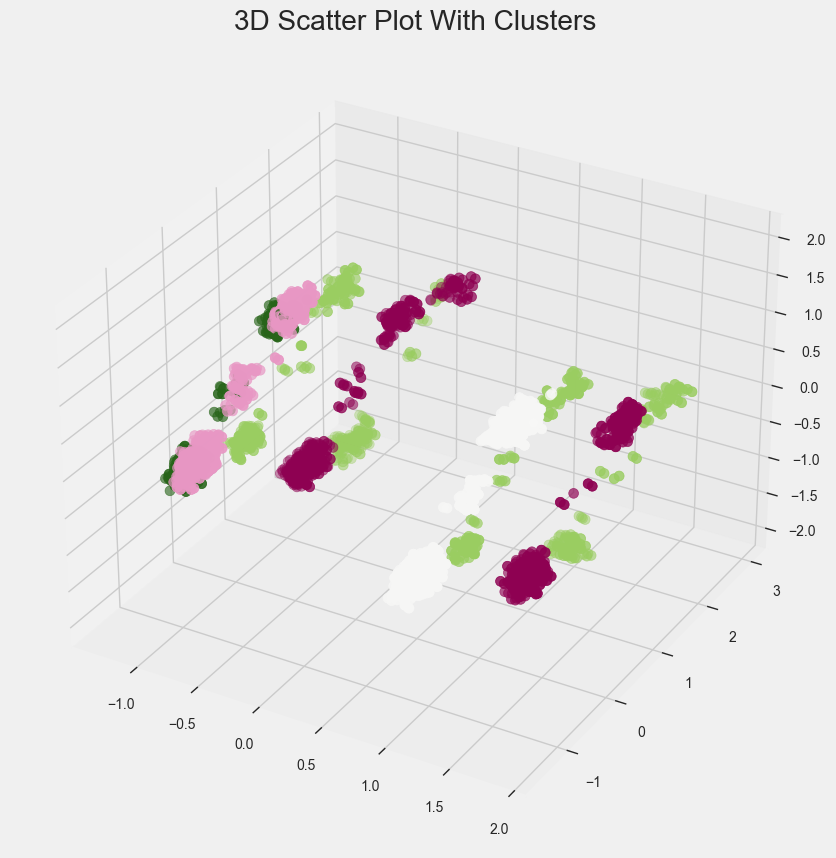

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='PiYG', s=50)
ax.set_title('3D Scatter Plot With Clusters')

plt.legend()
plt.show()

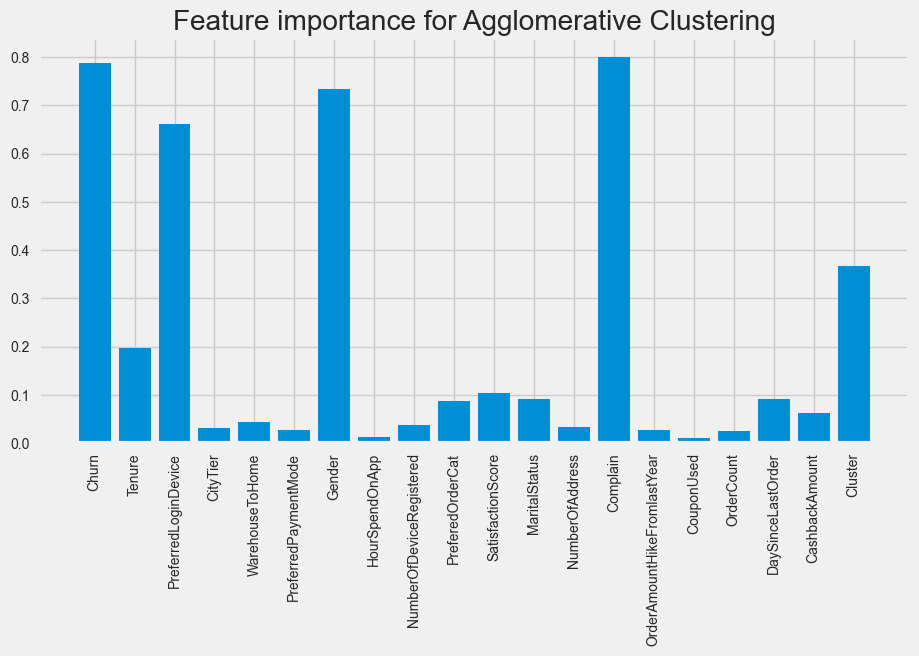

In [ ]:
cent = np.array([df.loc[agglomerative.labels_ == label].mean(axis=0) for label in np.unique(agglomerative.labels_)])

feature_importance = cent.std(axis=0)

plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance for Agglomerative Clustering')
plt.show()

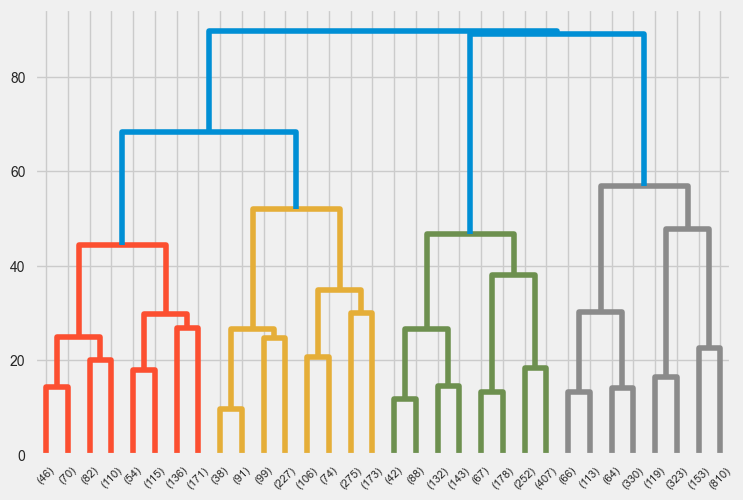

In [ ]:
import scipy.cluster.hierarchy as sch

X = df.values
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), truncate_mode='level', p=4)

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

def cosine_distance(x, y):
    return 1 - np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

dbscan = DBSCAN(metric=cosine_distance, eps=0.5, min_samples=10)
y_dbscan = dbscan.fit_predict(df)

print((y_dbscan != -1).sum())

plt.figure(figsize=(12, 12))

for i, y in enumerate((1,2), 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_pca[:, 0], X_pca[:, y], c=y_dbscan, cmap='PiYG', s=50)
    plt.title(f'Data Clusters')
    plt.xlabel(f'Principal Component {0}')
    plt.ylabel(f'Principal Component {y}')

KeyboardInterrupt: 

In [ ]:
num_clusters = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)

#print(f"Number of clusters predicted by DBSCAN: {num_clusters}")

#### HDBSCAN

2192


<Figure size 2000x500 with 0 Axes>

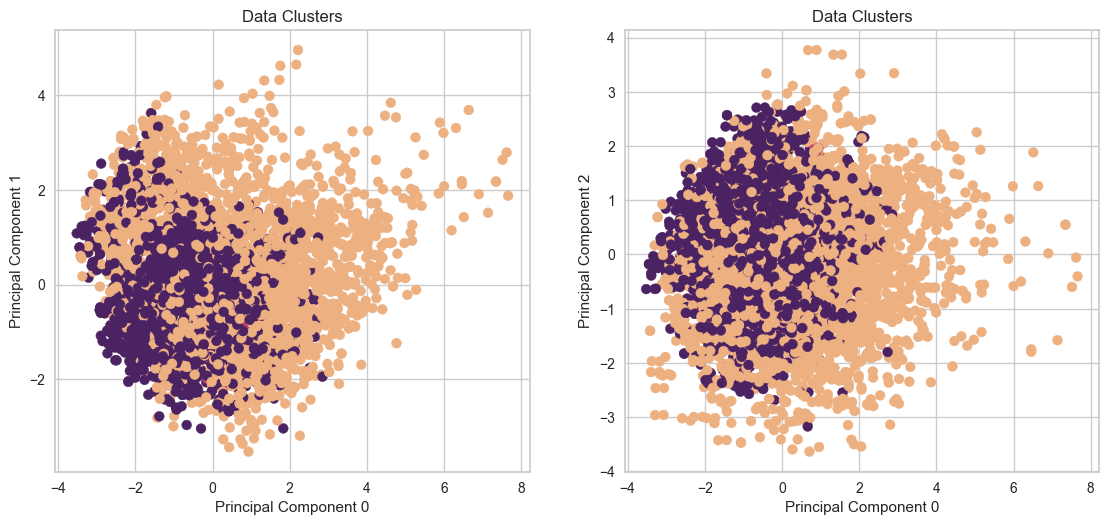

In [ ]:
import hdbscan

hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
y_hdbscan = hdbscan_clusterer.fit_predict(df)

print((y_hdbscan != -1).sum())

plt.figure(figsize=(20, 5))

plt.figure(figsize=(12, 12))

for i, y in enumerate((1,2), 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_pca[:, 0], X_pca[:, y], c=y_hdbscan, cmap='flare', s=50)
    plt.title(f'Data Clusters')
    plt.xlabel(f'Principal Component {0}')
    plt.ylabel(f'Principal Component {y}')

In [ ]:
num_clusters = len(set(y_hdbscan)) - (1 if -1 in y_dbscan else 0)

print(f"Number of clusters predicted by HDBSCAN: {num_clusters}")

Number of clusters predicted by HDBSCAN: 3


### Gaussian Mixture

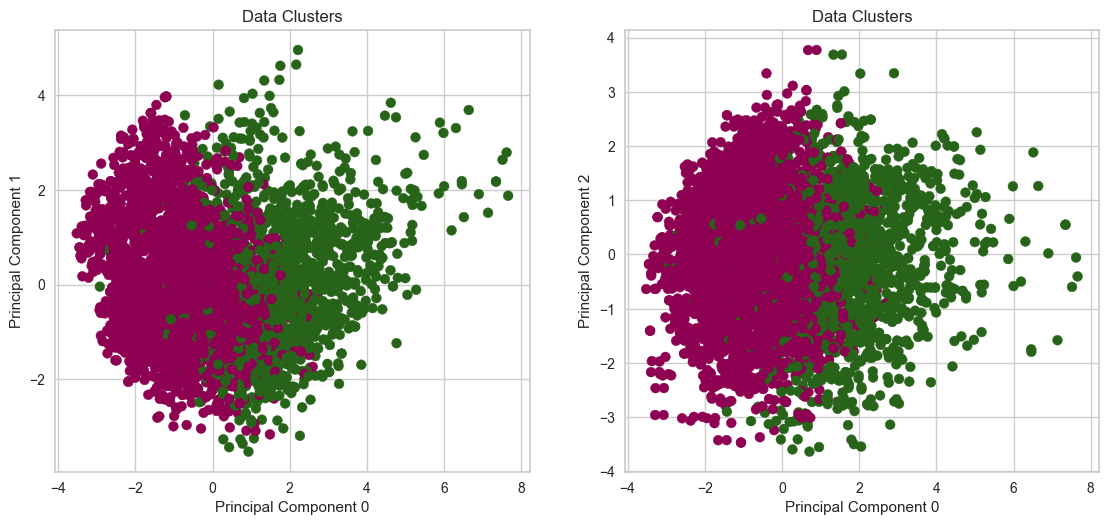

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=42)
clusters = gmm.fit_predict(df)

plt.figure(figsize=(12, 12))

for i, y in enumerate((1,2), 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_pca[:, 0], X_pca[:, y], c=clusters, cmap='PiYG', s=50)
    plt.title(f'Data Clusters')
    plt.xlabel(f'Principal Component {0}')
    plt.ylabel(f'Principal Component {y}')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


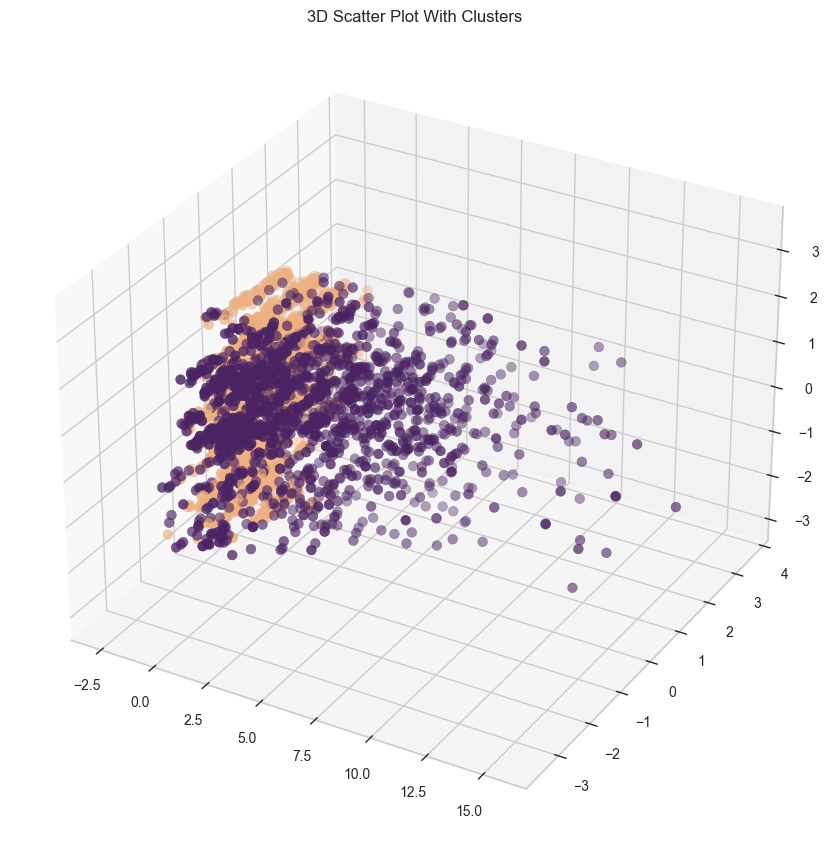

In [83]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='flare', s=50)
ax.set_title('3D Scatter Plot With Clusters')

plt.legend()
plt.show()